In [1]:
import pandas as pd
import numpy as np

# Data Exploration and Cleaning

In [2]:
attempt = pd.read_csv('big_listings.csv')

In [3]:
attempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23524 non-null  int64  
 1   listing_url                                   23524 non-null  object 
 2   scrape_id                                     23524 non-null  int64  
 3   last_scraped                                  23524 non-null  object 
 4   source                                        23524 non-null  object 
 5   name                                          23524 non-null  object 
 6   description                                   22908 non-null  object 
 7   neighborhood_overview                         12607 non-null  object 
 8   picture_url                                   23523 non-null  object 
 9   host_id                                       23524 non-null 

In [4]:
info_barrio = attempt[['id','neighbourhood_cleansed']]
info_barrio

,id,neighbourhood_cleansed
0,6369,Hispanoamérica
1,21853,Cármenes
2,24805,Universidad
3,26825,Legazpi
4,29044,Argüelles
...,...,...
23519,909556631090260919,Arapiles
23520,909558935732387134,Valdefuentes
23521,909816364908686307,Goya
23522,909901120567860703,Sol


In [5]:
info_barrio.to_csv('info_barrio.csv', index=True)

In [6]:
attempt['price']

0         $90.00
1         $31.00
2         $92.00
3         $29.00
4         $91.00
          ...   
23519     $64.00
23520    $120.00
23521    $132.00
23522    $107.00
23523     $91.00
Name: price, Length: 23524, dtype: object

In [7]:

attempt['price'] = attempt['price'].str.replace('[$,]', '', regex=True).astype(float)


In [8]:
correlation_matrix = attempt.corr()

# Get the correlation values for the 'price' column
price_correlation = correlation_matrix['price']

# Order the correlation values in descending order
price_correlation = price_correlation.sort_values(ascending=False)
price_correlation

/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/3891273539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = attempt.corr()


price                                           1.000000
accommodates                                    0.068726
beds                                            0.058358
bedrooms                                        0.051089
availability_30                                 0.033858
host_listings_count                             0.027069
host_total_listings_count                       0.026294
availability_60                                 0.025763
availability_90                                 0.023607
availability_365                                0.018593
review_scores_location                          0.010340
minimum_minimum_nights                          0.009945
latitude                                        0.008173
minimum_nights                                  0.007336
calculated_host_listings_count_entire_homes     0.006581
longitude                                       0.005834
minimum_nights_avg_ntm                          0.005452
maximum_minimum_nights         

In [9]:
# Calculate the Spearman's rank correlation matrix
correlation_matrix2 = attempt.corr(method='spearman')

# Get the correlation values for the 'price' column
price_correlation2 = correlation_matrix2['price']

# Order the correlation values in descending order
price_correlation2 = price_correlation.abs().sort_values(ascending=False)

# Print the correlation values in descending order
print(price_correlation2)

/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/2618137961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = attempt.corr(method='spearman')


price                                           1.000000
accommodates                                    0.068726
beds                                            0.058358
bedrooms                                        0.051089
availability_30                                 0.033858
host_listings_count                             0.027069
host_total_listings_count                       0.026294
id                                              0.026017
availability_60                                 0.025763
availability_90                                 0.023607
number_of_reviews_l30d                          0.022345
availability_365                                0.018593
calculated_host_listings_count_private_rooms    0.016467
number_of_reviews_ltm                           0.012130
review_scores_location                          0.010340
host_id                                         0.009976
minimum_minimum_nights                          0.009945
reviews_per_month              

In [10]:
attempt['amenities'][1]

'["Elevator", "Lock on bedroom door", "Oven", "Kitchen", "Wifi", "Cooking basics", "Microwave", "Fire extinguisher", "Free parking on premises", "Coffee maker", "Essentials", "First aid kit", "Refrigerator", "Dishes and silverware", "Heating", "Washer", "Hair dryer", "Air conditioning", "Shampoo", "Hot water", "Iron", "Pocket wifi", "Bed linens", "TV", "Extra pillows and blankets", "Hangers"]'

In [11]:
detailed = attempt[['id','bathrooms','bedrooms','host_is_superhost','beds','availability_30','review_scores_rating']]

In [12]:
attempt['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [13]:
attempt['bathrooms_text'].unique() #here, I decided to focus on only Entire home/apt

array(['1 private bath', '1 bath', '2 baths', '1.5 shared baths',
       '1 shared bath', '2 shared baths', 'Half-bath', '0 baths',
       '1.5 baths', '2.5 baths', nan, '3 baths', '3.5 baths',
       'Shared half-bath', '0 shared baths', '5.5 baths',
       '3 shared baths', '4 baths', '8 shared baths', '4.5 baths',
       '2.5 shared baths', '4.5 shared baths', '6 shared baths',
       '5 baths', '5.5 shared baths', '4 shared baths',
       '3.5 shared baths', 'Private half-bath', '5 shared baths',
       '10 baths', '6.5 baths', '7 baths', '6 baths', '8 baths',
       '7 shared baths', '20 shared baths', '9 baths'], dtype=object)

In [14]:
detailed = attempt[['id', 'bathrooms_text','accommodates','bedrooms', 'host_is_superhost', 'beds', 'availability_30', 'review_scores_rating']]
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23524 non-null  int64  
 1   bathrooms_text        23508 non-null  object 
 2   accommodates          23524 non-null  int64  
 3   bedrooms              14688 non-null  float64
 4   host_is_superhost     15593 non-null  object 
 5   beds                  23206 non-null  float64
 6   availability_30       23524 non-null  int64  
 7   review_scores_rating  18505 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [15]:
null_counts1 = detailed.isnull().sum()
null_counts1

id                         0
bathrooms_text            16
accommodates               0
bedrooms                8836
host_is_superhost       7931
beds                     318
availability_30            0
review_scores_rating    5019
dtype: int64

In [16]:
detailed['review_scores_rating'].max() #understand the rating scale

5.0

In [17]:
detailed.head(20)

,id,bathrooms_text,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating
0,6369,1 private bath,2,NaN,NaN,1.0,8,4.87
1,21853,1 bath,1,NaN,NaN,1.0,0,4.58
2,24805,1 bath,3,6.0,f,1.0,12,4.90
3,26825,1 private bath,1,NaN,NaN,1.0,2,4.72
4,29044,2 baths,3,2.0,t,2.0,6,5.00
5,30320,1 bath,2,1.0,f,2.0,0,4.63
6,30959,1 bath,2,1.0,f,1.0,0,4.38
7,40718,1 bath,4,1.0,f,2.0,3,4.61
8,40916,1 bath,3,1.0,f,3.0,0,4.65
9,47957,2 baths,3,2.0,t,2.0,4,4.83


In [18]:
detailed['bathrooms_text'] = detailed['bathrooms_text'].str.extract(r'(\d+)').astype(float)

/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/516084749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detailed['bathrooms_text'] = detailed['bathrooms_text'].str.extract(r'(\d+)').astype(float)


In [19]:
detailed.head(20)

,id,bathrooms_text,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating
0,6369,1.0,2,NaN,NaN,1.0,8,4.87
1,21853,1.0,1,NaN,NaN,1.0,0,4.58
2,24805,1.0,3,6.0,f,1.0,12,4.90
3,26825,1.0,1,NaN,NaN,1.0,2,4.72
4,29044,2.0,3,2.0,t,2.0,6,5.00
5,30320,1.0,2,1.0,f,2.0,0,4.63
6,30959,1.0,2,1.0,f,1.0,0,4.38
7,40718,1.0,4,1.0,f,2.0,3,4.61
8,40916,1.0,3,1.0,f,3.0,0,4.65
9,47957,2.0,3,2.0,t,2.0,4,4.83


In [20]:
detailed = detailed.rename(columns={'bathrooms_text': 'bathrooms'})
detailed

,id,bathrooms,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating
0,6369,1.0,2,NaN,NaN,1.0,8,4.87
1,21853,1.0,1,NaN,NaN,1.0,0,4.58
2,24805,1.0,3,6.0,f,1.0,12,4.90
3,26825,1.0,1,NaN,NaN,1.0,2,4.72
4,29044,2.0,3,2.0,t,2.0,6,5.00
...,...,...,...,...,...,...,...,...
23519,909556631090260919,1.0,2,1.0,f,1.0,29,NaN
23520,909558935732387134,2.0,4,3.0,f,4.0,0,NaN
23521,909816364908686307,1.0,2,NaN,f,1.0,17,NaN
23522,909901120567860703,1.0,3,1.0,f,1.0,12,NaN


In [21]:
detailed['host_is_superhost'].unique() #checking for any mistakes

array([nan, 'f', 't'], dtype=object)

In [22]:
detailed['monthly_occupancy'] = ((30 - detailed['availability_30']) / 30) #adding new column for occupancy

In [23]:
detailed.head()

,id,bathrooms,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy
0,6369,1.0,2,NaN,NaN,1.0,8,4.87,0.733333
1,21853,1.0,1,NaN,NaN,1.0,0,4.58,1.000000
2,24805,1.0,3,6.0,f,1.0,12,4.90,0.600000
3,26825,1.0,1,NaN,NaN,1.0,2,4.72,0.933333
4,29044,2.0,3,2.0,t,2.0,6,5.00,0.800000


In [24]:
attempt['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [25]:
attempt.groupby('room_type')['id'].count()

room_type
Entire home/apt    14873
Hotel room           124
Private room        8219
Shared room          308
Name: id, dtype: int64

In [26]:
room_type_counts = pd.Series([14873, 124, 8219, 308], index=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'])

total_listings = room_type_counts.sum()

percentages = (room_type_counts / total_listings) * 100

percentages

Entire home/apt    63.224792
Hotel room          0.527121
Private room       34.938786
Shared room         1.309301
dtype: float64

In [27]:
listings = pd.read_csv('big_listings2.csv')

In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23524 non-null  int64  
 1   name                            23524 non-null  object 
 2   host_id                         23524 non-null  int64  
 3   host_name                       23521 non-null  object 
 4   neighbourhood_group             23524 non-null  object 
 5   neighbourhood                   23524 non-null  object 
 6   latitude                        23524 non-null  float64
 7   longitude                       23524 non-null  float64
 8   room_type                       23524 non-null  object 
 9   price                           23524 non-null  int64  
 10  minimum_nights                  23524 non-null  int64  
 11  number_of_reviews               23524 non-null  int64  
 12  last_review                     

In [29]:
len(listings)

23524

In [30]:
listings['last_review'] = pd.to_datetime(listings['last_review']) #this column will serve as the last date when the set price was paid


In [31]:
null_counts = listings.isnull().sum()
null_counts

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5019
reviews_per_month                  5019
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           20872
dtype: int64

In [32]:
listings.drop('license', axis=1, inplace=True)

In [33]:
null_rows = listings[listings['last_review'].isnull()] #visualize rows with nulls in last_review column
null_rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9,460898,Rental unit in Madrid · 3 bedrooms · 3 beds · ...,2290984,Artur,Fuencarral - El Pardo,La Paz,40.485030,-3.698580,Private room,15,30,0,NaT,NaN,1,0,0
43,102040,Rental unit in Madrid · 1 bedroom · 1 bed · 1 ...,533936,Carlos Alberto,Ciudad Lineal,Pueblo Nuevo,40.434220,-3.641960,Private room,21,3,0,NaT,NaN,1,27,0
46,521329,Rental unit in Madrid · 1 bedroom · 1 bed · 1 ...,2563986,Elena,Chamartín,Hispanoamérica,40.455910,-3.687730,Private room,30,30,0,NaT,NaN,4,286,0
66,200828,Rental unit in Madrid · 2 bedrooms · 7 beds · ...,75944,Maite,Salamanca,Castellana,40.432010,-3.683580,Entire home/apt,286,14,0,NaT,NaN,1,365,0
80,572048,Rental unit in Madrid · 1 bedroom · 1 bed · 2 ...,1689652,Alfredo,Chamberí,Trafalgar,40.429930,-3.703390,Private room,30,3,0,NaT,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,908757271360095110,Rental unit in Madrid · ★New · 2 bedrooms · 2 ...,518713670,Bemadrid,Centro,Embajadores,40.409300,-3.695370,Entire home/apt,128,30,0,NaT,NaN,30,364,0
23520,908768034188159973,Rental unit in Madrid · ★New · 3 bedrooms · 3 ...,518713670,Bemadrid,Moncloa - Aravaca,Argüelles,40.430675,-3.720135,Entire home/apt,129,30,0,NaT,NaN,30,365,0
23521,908772325334371147,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,460488106,Alexander,Barajas,Timón,40.471325,-3.584069,Private room,33,1,0,NaT,NaN,2,352,0
23522,908774672501330570,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,518713670,Bemadrid,Chamartín,Castilla,40.470550,-3.673990,Entire home/apt,100,30,0,NaT,NaN,30,365,0


In [34]:
null_rows = listings[listings['last_review'].isnull()]  # Select rows with nulls in the 'last_review' column
listings.drop(null_rows.index, inplace=True)  # Drop the selected rows

In [35]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18505 entries, 0 to 23328
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18505 non-null  int64         
 1   name                            18505 non-null  object        
 2   host_id                         18505 non-null  int64         
 3   host_name                       18505 non-null  object        
 4   neighbourhood_group             18505 non-null  object        
 5   neighbourhood                   18505 non-null  object        
 6   latitude                        18505 non-null  float64       
 7   longitude                       18505 non-null  float64       
 8   room_type                       18505 non-null  object        
 9   price                           18505 non-null  int64         
 10  minimum_nights                  18505 non-null  int64         
 11  nu

In [36]:
listings.isnull().sum() #no more null values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [37]:
listings['last_review'].max() #revise when is the last date

Timestamp('2023-06-10 00:00:00')

In [38]:
listings['last_review'].min()

Timestamp('2012-08-04 00:00:00')

# New Column for Occupancy Rate

In [39]:
listings['occupancy_rate'] = ((365 - listings['availability_365']) / 365)
listings['occupancy_rate']

0        0.731507
1        0.142466
2        0.802740
3        0.558904
4        0.989041
           ...   
23251    0.860274
23254    0.049315
23258    0.013699
23286    0.558904
23328    0.049315
Name: occupancy_rate, Length: 18505, dtype: float64

In [40]:
len(listings['id'].unique())

18505

In [41]:
len(listings['id'])

18505

In [42]:
len(listings['host_id']) 

18505

In [43]:
len(listings['host_id'].unique()) #multiple hosts have various listings

9469

In [44]:
host_counts = listings['host_id'].value_counts().sort_values(ascending=False)
host_counts

377605855    258
291253690    166
28038703      99
107335103     99
107141654     94
            ... 
458187881      1
459514052      1
306446020      1
10805717       1
517857017      1
Name: host_id, Length: 9469, dtype: int64

In [45]:
marco = listings.loc[listings['host_id']==377605855] 
len(marco['name']) 

258

In [46]:
len(marco['name'].unique())

229

In [47]:
marco['name'].unique()

array(['Rental unit in Madrid · ★4.81 · 1 bedroom · 2 beds · 1 bath',
       'Rental unit in Madrid · ★4.24 · 3 bedrooms · 5 beds · 0 baths',
       'Rental unit in Madrid · ★4.21 · 1 bedroom · 1 bed · 1 bath',
       'Rental unit in Madrid · ★4.44 · 1 bedroom · 2 beds · 1 bath',
       'Rental unit in Madrid · ★4.59 · 1 bedroom · 2 beds · 1 bath',
       'Rental unit in Madrid · ★4.27 · 1 bedroom · 1 bed · 1 bath',
       'Rental unit in Madrid · ★4.26 · 4 bedrooms · 6 beds · 2 baths',
       'Rental unit in Madrid · ★4.46 · 5 bedrooms · 7 beds · 3 baths',
       'Rental unit in Madrid · ★4.84 · 1 bedroom · 4 beds · 2 baths',
       'Rental unit in Madrid · ★4.45 · 3 bedrooms · 4 beds · 2 baths',
       'Rental unit in Madrid · ★4.0 · 2 bedrooms · 4 beds · 1 bath',
       'Rental unit in Madrid · ★4.71 · 2 bedrooms · 4 beds · 1 bath',
       'Rental unit in Madrid · ★4.62 · 2 bedrooms · 4 beds · 1 bath',
       'Rental unit in Madrid · ★4.62 · 3 bedrooms · 5 beds · 0 baths',
       'R

In [48]:
# Assuming your DataFrame is named 'marco'

# Identify duplicated names
duplicated_names = marco[marco['name'].duplicated(keep=False)]

# Display the rows with duplicated names
duplicated_names


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate
11592,47884479,Rental unit in Madrid · ★4.44 · 1 bedroom · 2 ...,377605855,Marco,Chamberí,Trafalgar,40.434330,-3.702310,Entire home/apt,118,1,18,2023-05-05,0.67,266,159,8,0.564384
11597,47884485,Rental unit in Madrid · ★4.44 · 1 bedroom · 2 ...,377605855,Marco,Chamberí,Trafalgar,40.435910,-3.700920,Entire home/apt,140,1,18,2023-05-23,0.67,266,157,7,0.569863
11617,47880420,Rental unit in Madrid · ★4.62 · 2 bedrooms · 4...,377605855,Marco,Salamanca,Guindalera,40.440970,-3.664020,Entire home/apt,114,1,29,2023-04-02,1.10,266,93,11,0.745205
11633,47883465,Rental unit in Madrid · ★4.32 · 2 bedrooms · 3...,377605855,Marco,Chamberí,Arapiles,40.430880,-3.711500,Entire home/apt,157,1,34,2023-04-28,1.19,266,28,15,0.923288
11648,47883512,Rental unit in Madrid · ★4.69 · 2 bedrooms · 3...,377605855,Marco,Centro,Cortes,40.415310,-3.695140,Entire home/apt,394,1,26,2023-05-15,0.96,266,127,20,0.652055
11670,47883552,Rental unit in Madrid · ★4.29 · 2 bedrooms · 4...,377605855,Marco,Centro,Palacio,40.415790,-3.709240,Entire home/apt,240,1,31,2023-05-12,1.32,266,70,7,0.808219
11931,49107205,Rental unit in Madrid · ★4.25 · 1 bedroom · 3 ...,377605855,Marco,Centro,Cortes,40.416340,-3.700070,Entire home/apt,129,1,16,2023-06-01,0.74,266,142,7,0.610959
12022,49498113,Rental unit in Madrid · ★4.27 · 2 bedrooms · 4...,377605855,Marco,Usera,Almendrales,40.386280,-3.700950,Entire home/apt,120,1,11,2023-05-28,0.49,266,175,5,0.520548
12035,49511752,Rental unit in Madrid · ★4.62 · 2 bedrooms · 4...,377605855,Marco,Chamberí,Trafalgar,40.434420,-3.701330,Entire home/apt,218,1,26,2023-06-04,1.13,266,72,18,0.802740
12066,49589817,Rental unit in Madrid · ★4.57 · 2 bedrooms · 4...,377605855,Marco,Centro,Embajadores,40.412500,-3.703260,Entire home/apt,155,1,7,2023-01-04,0.29,266,330,2,0.095890


In [49]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18505 entries, 0 to 23328
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18505 non-null  int64         
 1   name                            18505 non-null  object        
 2   host_id                         18505 non-null  int64         
 3   host_name                       18505 non-null  object        
 4   neighbourhood_group             18505 non-null  object        
 5   neighbourhood                   18505 non-null  object        
 6   latitude                        18505 non-null  float64       
 7   longitude                       18505 non-null  float64       
 8   room_type                       18505 non-null  object        
 9   price                           18505 non-null  int64         
 10  minimum_nights                  18505 non-null  int64         
 11  nu

In [50]:
len(listings['id'].unique())

18505

In [51]:
len(listings['id'])

18505

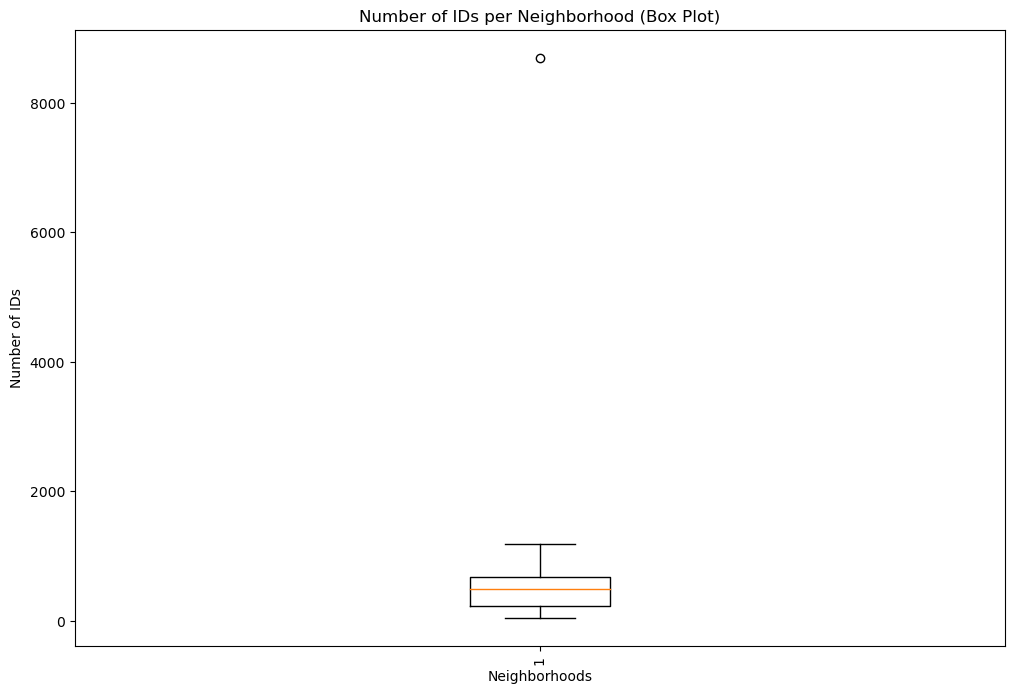

In [52]:
import matplotlib.pyplot as plt

# Create a boxplot of the number of IDs by neighborhood
plt.figure(figsize=(12, 8))
plt.boxplot(listings.groupby('neighbourhood_group')['id'].count())
plt.xlabel('Neighborhoods')
plt.ylabel('Number of IDs')
plt.title('Number of IDs per Neighborhood (Box Plot)')
plt.xticks(rotation=90)
plt.show()

In [53]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18505 entries, 0 to 23328
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18505 non-null  int64         
 1   name                            18505 non-null  object        
 2   host_id                         18505 non-null  int64         
 3   host_name                       18505 non-null  object        
 4   neighbourhood_group             18505 non-null  object        
 5   neighbourhood                   18505 non-null  object        
 6   latitude                        18505 non-null  float64       
 7   longitude                       18505 non-null  float64       
 8   room_type                       18505 non-null  object        
 9   price                           18505 non-null  int64         
 10  minimum_nights                  18505 non-null  int64         
 11  nu

In [54]:
# Calculate median price per neighborhood
median_price_neighborhood = listings.groupby('neighbourhood')['price'].median().reset_index()
median_price_neighborhood.columns = ['neighbourhood', 'median_price']

# Sort the DataFrame by median_price in descending order
median_price_neighborhood = median_price_neighborhood.sort_values(by='median_price', ascending=False)

# Calculate median price per neighborhood group
median_price_neighborhood_group = listings.groupby('neighbourhood_group')['price'].median().reset_index()
median_price_neighborhood_group.columns = ['neighbourhood_group', 'median_price']

# Sort the DataFrame by median_price in descending order
median_price_neighborhood_group = median_price_neighborhood_group.sort_values(by='median_price', ascending=False)


In [55]:
median_price_neighborhood

,neighbourhood,median_price
59,Horcajo,151.0
29,Castellana,150.0
98,Recoletos,141.5
118,Valdemarín,135.0
62,Jerónimos,132.5
...,...,...
10,Ambroz,30.0
68,Los Rosales,30.0
22,Campamento,29.5
0,Abrantes,29.5


In [56]:
median_price_neighborhood_group

,neighbourhood_group,median_price
14,Salamanca,120.0
3,Centro,106.0
4,Chamartín,93.0
13,Retiro,88.0
5,Chamberí,88.0
0,Arganzuela,81.0
16,Tetuán,79.0
10,Moncloa - Aravaca,74.0
8,Hortaleza,71.0
15,San Blas - Canillejas,60.0


In [57]:
# Calculate count of IDs per neighborhood
id_count_neighborhood = listings['neighbourhood'].value_counts().reset_index()
id_count_neighborhood.columns = ['neighbourhood', 'id_count']

# Sort the DataFrame by id_count in descending order
id_count_neighborhood = id_count_neighborhood.sort_values(by='id_count', ascending=False)

# Calculate count of IDs per neighborhood group
id_count_neighborhood_group = listings['neighbourhood_group'].value_counts().reset_index()
id_count_neighborhood_group.columns = ['neighbourhood_group', 'id_count']

# Sort the DataFrame by id_count in descending order
id_count_neighborhood_group = id_count_neighborhood_group.sort_values(by='id_count', ascending=False)

In [58]:
id_count_neighborhood_group

,neighbourhood_group,id_count
0,Centro,8696
1,Salamanca,1191
2,Chamberí,1034
3,Arganzuela,993
4,Tetuán,863
5,Retiro,674
6,Carabanchel,640
7,Ciudad Lineal,591
8,Puente de Vallecas,516
9,Latina,508


In [59]:
id_count_neighborhood

,neighbourhood,id_count
0,Embajadores,2375
1,Universidad,1888
2,Palacio,1542
3,Sol,1097
4,Justicia,953
...,...,...
121,Pavones,7
122,Corralejos,4
123,Valdemarín,4
124,El Pardo,1


In [60]:
listings = listings[~listings['neighbourhood'].isin(['El Pardo', 'Horcajo'])] #with only 1 listing, the median value overrepresents the price of the neighbhorhood


In [61]:
median_price_neighborhood

,neighbourhood,median_price
59,Horcajo,151.0
29,Castellana,150.0
98,Recoletos,141.5
118,Valdemarín,135.0
62,Jerónimos,132.5
...,...,...
10,Ambroz,30.0
68,Los Rosales,30.0
22,Campamento,29.5
0,Abrantes,29.5


In [62]:
median_price_neighborhood = listings.groupby('neighbourhood')['price'].median().reset_index()
median_price_neighborhood.columns = ['neighbourhood', 'median_price']
median_price_neighborhood = median_price_neighborhood.sort_values(by='median_price', ascending=False)
median_price_neighborhood = median_price_neighborhood.reset_index(drop=True)


In [63]:
median_price_neighborhood

,neighbourhood,median_price
0,Castellana,150.0
1,Recoletos,141.5
2,Valdemarín,135.0
3,Jerónimos,132.5
4,Atocha,132.0
...,...,...
119,Ambroz,30.0
120,Aluche,30.0
121,Campamento,29.5
122,Abrantes,29.5


In [64]:
median_price_neighborhood_group = listings.groupby('neighbourhood_group')['price'].median().reset_index()
median_price_neighborhood_group.columns = ['neighbourhood_group', 'median_price']

# Sort the DataFrame by median_price in descending order
median_price_neighborhood_group = median_price_neighborhood_group.sort_values(by='median_price', ascending=False)
median_price_neighborhood_group.reset_index(drop=True)

,neighbourhood_group,median_price
0,Salamanca,120.0
1,Centro,106.0
2,Chamartín,93.0
3,Retiro,88.0
4,Chamberí,88.0
5,Arganzuela,81.0
6,Tetuán,79.0
7,Moncloa - Aravaca,74.0
8,Hortaleza,71.0
9,San Blas - Canillejas,60.0


In [65]:
listings['last_review'].max()

Timestamp('2023-06-10 00:00:00')

In [66]:
listings['last_review'].min()

Timestamp('2012-08-04 00:00:00')

In [67]:
listings['last_review'].unique()

array(['2023-05-31T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2023-06-05T00:00:00.000000000', ...,
       '2022-04-29T00:00:00.000000000', '2022-11-17T00:00:00.000000000',
       '2023-06-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
unique_years = listings['last_review'].dt.year.unique()

# Display the unique years
print(unique_years)


[2023 2018 2022 2017 2021 2019 2016 2012 2015 2020 2014 2013]


# Create table for median price per neighbourhood

In [69]:
# Calculate median price per year per neighborhood group per neighborhood
median_price_per_year_neigh_group_neigh = listings.groupby([listings['last_review'].dt.year, 'neighbourhood_group', 'neighbourhood'])['price'].median()

# Display the median price per year per neighborhood group per neighborhood
median_price_per_year_neigh_group_neigh


last_review  neighbourhood_group  neighbourhood
2012         Chamartín            Castilla          75.0
             Retiro               Pacífico          19.0
2013         Centro               Embajadores      101.0
                                  Justicia         109.5
             Salamanca            Castellana       110.0
                                                   ...  
2023         Villaverde           Butarque          39.0
                                  Los Angeles       27.0
                                  Los Rosales       25.0
                                  San Andrés        67.0
                                  San Cristobal     43.5
Name: price, Length: 781, dtype: float64

In [70]:
# Assuming your DataFrame is named 'listings'

# Calculate median price per year per neighborhood group per neighborhood
median_price_per_year_neigh_group_neigh = listings.groupby([listings['last_review'].dt.year, 'neighbourhood_group', 'neighbourhood'])['price'].median().reset_index()

# Use pivot_table to create a DataFrame with the desired structure
pivot_median_price = median_price_per_year_neigh_group_neigh.pivot_table(index=['neighbourhood_group', 'neighbourhood'], columns='last_review', values='price')

# Display the pivot table
pivot_median_price 


last_review                        2012  2013  2014  2015  2016  2017  2018  \
neighbourhood_group neighbourhood                                             
Arganzuela          Acacias         NaN   NaN   NaN  37.5  30.0  47.5  48.0   
                    Atocha          NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Chopera         NaN   NaN   NaN  25.0  45.5  32.0  36.0   
                    Delicias        NaN   NaN   NaN  70.0  48.0  43.0  53.0   
                    Imperial        NaN   NaN   NaN  55.0  45.0  50.0  78.0   
...                                 ...   ...   ...   ...   ...   ...   ...   
Villaverde          Butarque        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Los Angeles     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Los Rosales     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    San Andrés      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    San Cristobal   NaN   NaN   NaN   NaN   NaN   NaN  12.0   

last_review                        2019   2020   2021   2022   2023  
neighbourhood_group neighbourhood                                    
Arganzuela          Acacias        45.0  112.5   33.0   53.0   82.5  
                    Atocha         75.0  103.0    NaN  121.0  138.5  
                    Chopera        64.0   35.0   55.0   75.0   72.0  
                    Delicias       72.5  130.0  110.0   70.0   75.0  
                    Imperial       47.5  267.5   85.0   70.0   90.0  
...                                 ...    ...    ...    ...    ...  
Villaverde          Butarque       15.0    NaN   13.5   62.5   39.0  
                    Los Angeles    60.5    NaN   46.0   79.0   27.0  
                    Los Rosales    30.0   45.0    NaN   84.0   25.0  
                    San Andrés     16.0   16.0   19.0   67.0   67.0  
                    San Cristobal   NaN    NaN   86.0   77.5   43.5  

[124 rows x 12 columns]

In [71]:
median_price_year = pivot_median_price.reset_index()
median_price_year


last_review,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arganzuela,Acacias,NaN,NaN,NaN,37.5,30.0,47.5,48.0,45.0,112.5,33.0,53.0,82.5
1,Arganzuela,Atocha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,103.0,NaN,121.0,138.5
2,Arganzuela,Chopera,NaN,NaN,NaN,25.0,45.5,32.0,36.0,64.0,35.0,55.0,75.0,72.0
3,Arganzuela,Delicias,NaN,NaN,NaN,70.0,48.0,43.0,53.0,72.5,130.0,110.0,70.0,75.0
4,Arganzuela,Imperial,NaN,NaN,NaN,55.0,45.0,50.0,78.0,47.5,267.5,85.0,70.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Villaverde,Butarque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,13.5,62.5,39.0
120,Villaverde,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,NaN,46.0,79.0,27.0
121,Villaverde,Los Rosales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,45.0,NaN,84.0,25.0
122,Villaverde,San Andrés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,19.0,67.0,67.0


In [72]:
median_price_year[median_price_year['neighbourhood']=='Castellana'] #exploring new df

last_review,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
88,Salamanca,Castellana,NaN,110.0,NaN,50.0,54.5,29.0,63.5,100.0,99.0,113.0,160.5,169.0


In [73]:
median_price_year[median_price_year['neighbourhood']=='Embajadores']

last_review,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
20,Centro,Embajadores,NaN,101.0,345.0,30.0,38.0,46.0,60.0,50.0,72.0,85.0,85.0,100.0


In [74]:
median_price_year.reset_index(drop=True, inplace=True)
median_price_year

last_review,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arganzuela,Acacias,NaN,NaN,NaN,37.5,30.0,47.5,48.0,45.0,112.5,33.0,53.0,82.5
1,Arganzuela,Atocha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,103.0,NaN,121.0,138.5
2,Arganzuela,Chopera,NaN,NaN,NaN,25.0,45.5,32.0,36.0,64.0,35.0,55.0,75.0,72.0
3,Arganzuela,Delicias,NaN,NaN,NaN,70.0,48.0,43.0,53.0,72.5,130.0,110.0,70.0,75.0
4,Arganzuela,Imperial,NaN,NaN,NaN,55.0,45.0,50.0,78.0,47.5,267.5,85.0,70.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Villaverde,Butarque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,13.5,62.5,39.0
120,Villaverde,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,NaN,46.0,79.0,27.0
121,Villaverde,Los Rosales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,45.0,NaN,84.0,25.0
122,Villaverde,San Andrés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,19.0,67.0,67.0


In [75]:
median_price_year = median_price_year.reset_index().rename_axis(columns={'last_review': 'index'})
median_price_year

index,index,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,Arganzuela,Acacias,NaN,NaN,NaN,37.5,30.0,47.5,48.0,45.0,112.5,33.0,53.0,82.5
1,1,Arganzuela,Atocha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,103.0,NaN,121.0,138.5
2,2,Arganzuela,Chopera,NaN,NaN,NaN,25.0,45.5,32.0,36.0,64.0,35.0,55.0,75.0,72.0
3,3,Arganzuela,Delicias,NaN,NaN,NaN,70.0,48.0,43.0,53.0,72.5,130.0,110.0,70.0,75.0
4,4,Arganzuela,Imperial,NaN,NaN,NaN,55.0,45.0,50.0,78.0,47.5,267.5,85.0,70.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,Villaverde,Butarque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,13.5,62.5,39.0
120,120,Villaverde,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,NaN,46.0,79.0,27.0
121,121,Villaverde,Los Rosales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,45.0,NaN,84.0,25.0
122,122,Villaverde,San Andrés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,19.0,67.0,67.0


In [76]:
median_price_year.to_csv('median_price_year.csv', index=True)

# Create table for the number of listings per neighbourhood

In [77]:
listing_count = listings.groupby([listings['last_review'].dt.year, 'neighbourhood_group', 'neighbourhood'])['id'].count().reset_index()

# Use pivot_table to create a DataFrame with the desired structure
listing_count = listing_count.pivot_table(index=['neighbourhood_group', 'neighbourhood'], columns='last_review', values='id')

# Display the pivot table
listing_count 


last_review                        2012  2013  2014  2015  2016  2017  2018  \
neighbourhood_group neighbourhood                                             
Arganzuela          Acacias         NaN   NaN   NaN   2.0   3.0   6.0   7.0   
                    Atocha          NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Chopera         NaN   NaN   NaN   1.0   2.0   3.0   2.0   
                    Delicias        NaN   NaN   NaN   1.0   2.0   8.0  10.0   
                    Imperial        NaN   NaN   NaN   1.0   2.0   2.0   3.0   
...                                 ...   ...   ...   ...   ...   ...   ...   
Villaverde          Butarque        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Los Angeles     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    Los Rosales     NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    San Andrés      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                    San Cristobal   NaN   NaN   NaN   NaN   NaN   NaN   3.0   

last_review                        2019  2020  2021  2022   2023  
neighbourhood_group neighbourhood                                 
Arganzuela          Acacias        10.0   6.0   5.0  14.0  102.0  
                    Atocha          1.0   1.0   NaN   1.0   12.0  
                    Chopera         7.0  11.0   5.0  13.0   89.0  
                    Delicias       10.0  10.0   2.0  23.0  103.0  
                    Imperial       10.0   2.0   3.0  17.0   94.0  
...                                 ...   ...   ...   ...    ...  
Villaverde          Butarque        1.0   NaN   2.0   2.0   14.0  
                    Los Angeles     2.0   NaN   1.0   4.0   21.0  
                    Los Rosales     3.0   3.0   NaN   3.0   30.0  
                    San Andrés      3.0   1.0   1.0   5.0   36.0  
                    San Cristobal   NaN   NaN   1.0   4.0   14.0  

[124 rows x 12 columns]

In [78]:
# Assuming your DataFrame is named 'listing_count'

# Fill NaN values with zeros
listing_count_filled = listing_count.fillna(0)

# Convert all columns to integers
listing_count_int = listing_count_filled.astype(int)

# Display the DataFrame with all columns as integers


In [79]:
listing_count  = listing_count_int.reset_index()
listing_count = listing_count_int.reset_index().rename_axis(columns={'last_review': 'index'})
listing_count

index,neighbourhood_group,neighbourhood,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arganzuela,Acacias,0,0,0,2,3,6,7,10,6,5,14,102
1,Arganzuela,Atocha,0,0,0,0,0,0,0,1,1,0,1,12
2,Arganzuela,Chopera,0,0,0,1,2,3,2,7,11,5,13,89
3,Arganzuela,Delicias,0,0,0,1,2,8,10,10,10,2,23,103
4,Arganzuela,Imperial,0,0,0,1,2,2,3,10,2,3,17,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Villaverde,Butarque,0,0,0,0,0,0,0,1,0,2,2,14
120,Villaverde,Los Angeles,0,0,0,0,0,0,0,2,0,1,4,21
121,Villaverde,Los Rosales,0,0,0,0,0,0,0,3,3,0,3,30
122,Villaverde,San Andrés,0,0,0,0,0,0,0,3,1,1,5,36


In [80]:
listing_count.to_csv('listing_count.csv', index=True)

# Now, I want to create a table for the last year of info. (Jul.22-23)

In [81]:
listings['last_review'].max()

Timestamp('2023-06-10 00:00:00')

In [82]:
import datetime

import pandas as pd
from datetime import datetime, timedelta

end_date = pd.Timestamp('2023-06-10')
start_date = end_date - timedelta(days=365)

filtered_df = listings[(listings['last_review'] >= start_date) & (listings['last_review'] <= end_date)]

filtered_df.to_csv('airbnb_madrid22.csv', index=True)

In [83]:
filtered_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,4,104,2023-05-31,0.65,1,98,9,0.731507
2,451174,casa particular in Madrid · ★4.71 · 1 bedroom ...,2240898,Alejandro,Chamberí,Almagro,40.434551,-3.698387,Private room,47,3,33,2023-06-05,0.53,1,72,21,0.802740
3,24805,Rental unit in Madrid · ★4.90 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,0.28,1,161,11,0.558904
4,456165,Guest suite in Madrid · ★5.0 · 1 bedroom · 1 b...,617086,Agata,Carabanchel,Comillas,40.390320,-3.713820,Private room,30,2,10,2023-05-21,0.14,1,4,3,0.989041
5,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Maria,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,3,194,2023-05-16,1.22,1,285,30,0.219178


In [84]:
filtered_df['room_type'].unique() #making sure only entire apt. are selected

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [85]:
filtered_df['last_review'].max() 

Timestamp('2023-06-10 00:00:00')

In [86]:
filtered_df['last_review'].min() #making sure the time range is correct

Timestamp('2022-06-10 00:00:00')

In [87]:
filtered_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,4,104,2023-05-31,0.65,1,98,9,0.731507
2,451174,casa particular in Madrid · ★4.71 · 1 bedroom ...,2240898,Alejandro,Chamberí,Almagro,40.434551,-3.698387,Private room,47,3,33,2023-06-05,0.53,1,72,21,0.802740
3,24805,Rental unit in Madrid · ★4.90 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,0.28,1,161,11,0.558904
4,456165,Guest suite in Madrid · ★5.0 · 1 bedroom · 1 b...,617086,Agata,Carabanchel,Comillas,40.390320,-3.713820,Private room,30,2,10,2023-05-21,0.14,1,4,3,0.989041
5,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Maria,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,3,194,2023-05-16,1.22,1,285,30,0.219178


In [88]:
apts_district = filtered_df.groupby(['neighbourhood_group'])['id'].count().reset_index()
apts_district = apts_district.sort_values(by='id', ascending=False)
apts_district

,neighbourhood_group,id
3,Centro,7305
14,Salamanca,968
5,Chamberí,797
0,Arganzuela,752
16,Tetuán,709
13,Retiro,543
2,Carabanchel,507
6,Ciudad Lineal,467
12,Puente de Vallecas,425
4,Chamartín,379


In [89]:
filtered_df.groupby(['neighbourhood_group', 'neighbourhood'])['id'].count().reset_index()

,neighbourhood_group,neighbourhood,id
0,Arganzuela,Acacias,115
1,Arganzuela,Atocha,13
2,Arganzuela,Chopera,99
3,Arganzuela,Delicias,124
4,Arganzuela,Imperial,105
...,...,...,...
119,Villaverde,Butarque,15
120,Villaverde,Los Angeles,25
121,Villaverde,Los Rosales,33
122,Villaverde,San Andrés,40


In [90]:
listing_23 = filtered_df.groupby(['neighbourhood_group', 'neighbourhood'])['id'].count().reset_index()

# Use pivot_table to create a DataFrame with the desired structure
listing_23 = listing_23.pivot_table(index=['neighbourhood_group', 'neighbourhood'], values='id')

# Display the pivot table
listing_23 = listing_23.fillna(0)

# Convert all columns to integers
listing_23 = listing_23.astype(int)
listing_23 = listing_23.sort_values(by='id', ascending=False)
listing_23  = listing_23.reset_index()
listing_23
listing_23.to_csv('listing_23.csv', index=True)

In [91]:
listing_23.head(25)

,neighbourhood_group,neighbourhood,id
0,Centro,Embajadores,1987
1,Centro,Universidad,1544
2,Centro,Palacio,1290
3,Centro,Sol,961
4,Centro,Justicia,772
5,Centro,Cortes,751
6,Chamberí,Trafalgar,268
7,Arganzuela,Palos de Moguer,264
8,Salamanca,Goya,246
9,Salamanca,Guindalera,224


# Left Join with Detailed Table 

In [92]:
full_info = pd.merge(filtered_df, detailed, how='left', on='id') #create a new column for separate dates

In [93]:
full_info['last_review'] 

0       2023-05-31
1       2023-06-05
2       2023-05-23
3       2023-05-21
4       2023-05-16
           ...    
15103   2023-06-08
15104   2023-06-09
15105   2023-06-08
15106   2023-06-04
15107   2023-06-08
Name: last_review, Length: 15108, dtype: datetime64[ns]

In [94]:
full_info['year'] = pd.to_datetime(full_info['last_review']).dt.year
full_info['month'] = pd.to_datetime(full_info['last_review']).dt.month
full_info['day'] = pd.to_datetime(full_info['last_review']).dt.day

In [95]:
full_info.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,year,month,day
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,...,2,NaN,NaN,1.0,8,4.87,0.733333,2023,5,31
1,451174,casa particular in Madrid · ★4.71 · 1 bedroom ...,2240898,Alejandro,Chamberí,Almagro,40.434551,-3.698387,Private room,47,...,1,NaN,NaN,1.0,12,4.71,0.600000,2023,6,5
2,24805,Rental unit in Madrid · ★4.90 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,...,3,6.0,f,1.0,12,4.90,0.600000,2023,5,23
3,456165,Guest suite in Madrid · ★5.0 · 1 bedroom · 1 b...,617086,Agata,Carabanchel,Comillas,40.390320,-3.713820,Private room,30,...,1,NaN,NaN,1.0,4,5.00,0.866667,2023,5,21
4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Maria,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,...,1,NaN,NaN,1.0,2,4.72,0.933333,2023,5,16


In [96]:
full_info[(full_info['neighbourhood']=='Recoletos')&(full_info['month']==12)&(full_info['price']==217)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,year,month,day
12461,770947970142993346,Rental unit in Madrid · 3 bedrooms · 3 beds · ...,106591951,Luxa Home,Salamanca,Recoletos,40.4251,-3.68071,Entire home/apt,217,...,6,3.0,f,3.0,9,5.0,0.7,2022,12,31


In [97]:
full_info.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15108 entries, 0 to 15107
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15108 non-null  int64         
 1   name                            15108 non-null  object        
 2   host_id                         15108 non-null  int64         
 3   host_name                       15108 non-null  object        
 4   neighbourhood_group             15108 non-null  object        
 5   neighbourhood                   15108 non-null  object        
 6   latitude                        15108 non-null  float64       
 7   longitude                       15108 non-null  float64       
 8   room_type                       15108 non-null  object        
 9   price                           15108 non-null  int64         
 10  minimum_nights                  15108 non-null  int64         
 11  nu

In [98]:
columns_to_drop = ['name', 'host_id', 'host_name','calculated_host_listings_count','year','number_of_reviews_ltm']

# Drop the columns from the DataFrame
full_info = full_info.drop(columns_to_drop, axis=1)

In [99]:
full_info.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,bathrooms,accommodates,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,month,day
0,6369,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,4,104,2023-05-31,...,1.0,2,NaN,NaN,1.0,8,4.87,0.733333,5,31
1,451174,Chamberí,Almagro,40.434551,-3.698387,Private room,47,3,33,2023-06-05,...,1.0,1,NaN,NaN,1.0,12,4.71,0.600000,6,5
2,24805,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,...,1.0,3,6.0,f,1.0,12,4.90,0.600000,5,23
3,456165,Carabanchel,Comillas,40.390320,-3.713820,Private room,30,2,10,2023-05-21,...,1.0,1,NaN,NaN,1.0,4,5.00,0.866667,5,21
4,26825,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,3,194,2023-05-16,...,1.0,1,NaN,NaN,1.0,2,4.72,0.933333,5,16


In [100]:
full_info['neighbourhood_group'].unique()

array(['Chamartín', 'Chamberí', 'Centro', 'Carabanchel', 'Arganzuela',
       'Moncloa - Aravaca', 'Salamanca', 'Ciudad Lineal',
       'San Blas - Canillejas', 'Villaverde', 'Hortaleza', 'Retiro',
       'Tetuán', 'Barajas', 'Usera', 'Latina', 'Fuencarral - El Pardo',
       'Puente de Vallecas', 'Moratalaz', 'Vicálvaro',
       'Villa de Vallecas'], dtype=object)

In [101]:
# Creating a dictionary to map neighborhood group values to numbers
district_dict = {'Centro': 1, 
                 'Moncloa - Aravaca': 2, 
                 'Salamanca': 3, 
                 'Chamberí': 4, 
                 'Ciudad Lineal': 5,
                 'Retiro': 6, 
                 'Barajas': 7, 
                 'Arganzuela': 8, 
                 'Hortaleza': 9,
                 'Tetuán': 10, 
                 'Villaverde': 11 , 
                 'Chamartín': 12, 
                 'Fuencarral - El Pardo': 13,
                 'Puente de Vallecas': 14, 
                 'San Blas - Canillejas': 15, 
                 'Moratalaz': 16,
                 'Vicálvaro': 17, 
                 'Carabanchel': 18, 
                 'Latina': 19, 
                 'Villa de Vallecas': 20, 
                 'Usera': 21}

# Create the district_key column by mapping the values from neighbourhood_group

full_info['district_key'] = full_info['neighbourhood_group'].map(district_dict)

In [102]:
full_info['neighbourhood'].unique() 

array(['Hispanoamérica', 'Almagro', 'Universidad', 'Comillas', 'Legazpi',
       'Sol', 'Argüelles', 'Palacio', 'Justicia', 'Embajadores', 'Goya',
       'Trafalgar', 'Cortes', 'Concepción', 'Arcos', 'Rios Rosas',
       'Los Angeles', 'Piovera', 'Ibiza', 'Recoletos', 'Canillas',
       'Cuatro Caminos', 'Casco Histórico de Barajas', 'San Fermín',
       'Chopera', 'Palos de Moguer', 'Valdefuentes', 'Berruguete',
       'Lucero', 'Pueblo Nuevo', 'Delicias', 'Pacífico', 'Almenara',
       'Pinar del Rey', 'Niño Jesús', 'Lista', 'El Viso',
       'Alameda de Osuna', 'Valverde', 'Arapiles', 'San Diego', 'Acacias',
       'Castillejos', 'Rejas', 'Costillares', 'Simancas', 'Jerónimos',
       'Timón', 'Numancia', 'Marroquina', 'Salvador', 'Gaztambide',
       'San Andrés', 'Castilla', 'Palomeras Sureste', 'San Juan Bautista',
       'Casco Histórico de Vicálvaro', 'Atocha', 'Nueva España',
       'Casco Histórico de Vallecas', 'Cármenes', 'Opañel',
       'Puerta del Angel', 'Ventas', 'Pros

In [103]:
barrio_dict = {'Universidad': 1, 
                     'Sol': 2, 
                     'Argüelles': 3, 
                     'Palacio': 4, 
                     'Justicia': 5,
                     'Embajadores': 6, 
                     'Goya': 7, 
                     'Trafalgar': 8, 
                     'Concepción': 9,
                     'Almagro': 10, 
                     'Rios Rosas': 11, 
                     'Ibiza': 12, 
                     'Recoletos': 13,
                     'Casco Histórico de Barajas': 14, 
                     'Chopera': 15, 
                     'Palos de Moguer': 16,
                     'Valdefuentes': 17, 
                     'Delicias': 18, 
                     'Cortes': 19,
                     'Pacífico': 20, 
                     'Almenara': 21, 
                     'Pinar del Rey': 22, 
                     'Niño Jesús': 23,
                     'Los Angeles': 24, 
                     'El Viso': 25, 
                     'Valverde': 26, 
                     'Arapiles': 27, 
                     'San Diego': 28,
                     'Castillejos': 29, 
                     'Rejas': 30, 
                     'Simancas': 31, 
                     'Timón': 32, 
                     'Marroquina': 33,
                     'San Andrés': 34, 
                     'Castilla': 35, 
                     'San Juan Bautista': 36,
                     'Casco Histórico de Vicálvaro': 37, 
                     'Atocha': 38, 
                     'Cuatro Caminos': 39, 
                     'Nueva España': 40,
                     'Lista': 41, 
                     'Opañel': 42, 
                     'Gaztambide': 43, 
                     'Acacias': 44,
                     'Berruguete': 45, 
                     'Ventas': 46, 
                     'Fontarrón': 47, 
                     'Comillas': 48, 
                     'Prosperidad': 49,
                     'Fuente del Berro': 50,
                     'Guindalera': 51, 
                     'Jerónimos': 52, 
                     'Castellana': 53,
                     'Imperial': 54, 
                     'Ciudad Jardín': 55, 
                     'Aravaca': 56, 
                     'Puerta del Angel': 57,
                     'Valdezarza': 58, 
                     'San Isidro': 59, 
                     'Hispanoamérica': 60, 
                     'La Paz': 61, 
                     'Colina': 62,
                     'Casa de Campo': 63, 
                     'Quintana': 64, 
                     'Lucero': 65, 
                     'Apostol Santiago': 66,
                     'Canillas': 67, 
                     'Palomas': 68, 
                     'Casco Histórico de Vallecas': 69, 
                     'Peñagrande': 70,
                     'Moscardó': 71, 
                     'Palomeras Bajas': 72, 
                     'Campamento': 73, 
                     'Piovera': 74, 
                     'Adelfas': 75,
                     'Costillares': 76, 
                     'San Fermín': 77, 
                     'Almendrales': 78, 
                     'Aeropuerto': 79,
                     'Palomeras Sureste': 80, 
                     'Bellas Vistas': 81, 
                     'Numancia': 82, 
                     'Valdeacederas': 83,
                     'Zofío': 84, 
                     'Orcasur': 85, 
                     'Buenavista': 86, 
                     'San Cristobal': 87, 
                     'Canillejas': 88,
                     'Santa Eugenia': 89,
                     'Hellín': 90,
                     'Pilar': 91,
                     'Vista Alegre': 92,
                     'Cuatro Vientos': 93,
                     'El Goloso': 94, 
                     'Vallehermoso': 95, 
                     'Pueblo Nuevo': 96,
                     'Ciudad Universitaria': 97, 
                     'San Pascual': 98, 
                     'Amposta': 99, 
                     'Legazpi': 100,
                     'Puerta Bonita': 101, 
                     'Corralejos': 102, 
                     'Entrevías': 103, 
                     'Cármenes': 104,
                     'Mirasierra': 105, 
                     'Media Legua': 106, 
                     'Salvador': 107, 
                     'Portazgo': 108, 
                     'Estrella': 109,
                     'Aguilas': 110, 
                     'Rosas': 111, 
                     'Los Rosales': 112, 
                     'Alameda de Osuna': 113,
                     'Pradolongo': 114, 
                     'Vinateros': 115, 
                     'Aluche': 116, 
                     'Pavones': 117, 
                     'Arcos': 118,
                     'Butarque': 119, 
                     'El Plantío': 120, 
                     'Abrantes': 121, 
                     'Valdemarín': 122, 
                     'Orcasitas': 123,
                     'Ambroz': 124}


In [104]:
len(full_info['neighbourhood'].unique())

124

In [105]:
full_info['neighborhood_key'] = full_info['neighbourhood'].map(barrio_dict)

In [106]:
full_info.groupby('neighborhood_key')['id'].count().sort_values(ascending=False).reset_index()

,neighborhood_key,id
0,6,1987
1,1,1544
2,4,1290
3,2,961
4,5,772
...,...,...
119,117,5
120,94,5
121,79,4
122,102,3


In [107]:
full_info.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90,4,104,2023-05-31,...,NaN,NaN,1.0,8,4.87,0.733333,5,31,12,60
1,451174,Chamberí,Almagro,40.434551,-3.698387,Private room,47,3,33,2023-06-05,...,NaN,NaN,1.0,12,4.71,0.600000,6,5,4,10
2,24805,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,...,6.0,f,1.0,12,4.90,0.600000,5,23,1,1
3,456165,Carabanchel,Comillas,40.390320,-3.713820,Private room,30,2,10,2023-05-21,...,NaN,NaN,1.0,4,5.00,0.866667,5,21,18,48
4,26825,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,3,194,2023-05-16,...,NaN,NaN,1.0,2,4.72,0.933333,5,16,8,100


In [108]:
columns_to_drop = ['neighbourhood']

full_info = full_info.drop(columns_to_drop, axis=1)

In [109]:
full_info

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,40.457240,-3.676880,Private room,90,4,104,2023-05-31,0.65,...,NaN,NaN,1.0,8,4.87,0.733333,5,31,12,60
1,451174,Chamberí,40.434551,-3.698387,Private room,47,3,33,2023-06-05,0.53,...,NaN,NaN,1.0,12,4.71,0.600000,6,5,4,10
2,24805,Centro,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,0.28,...,6.0,f,1.0,12,4.90,0.600000,5,23,1,1
3,456165,Carabanchel,40.390320,-3.713820,Private room,30,2,10,2023-05-21,0.14,...,NaN,NaN,1.0,4,5.00,0.866667,5,21,18,48
4,26825,Arganzuela,40.389750,-3.690180,Private room,29,3,194,2023-05-16,1.22,...,NaN,NaN,1.0,2,4.72,0.933333,5,16,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103,904819749016138029,Usera,40.389707,-3.707122,Entire home/apt,85,1,2,2023-06-08,2.00,...,3.0,f,3.0,14,5.00,0.533333,6,8,21,71
15104,904823486276787394,Ciudad Lineal,40.431553,-3.656522,Private room,23,1,1,2023-06-09,1.00,...,NaN,NaN,1.0,12,5.00,0.600000,6,9,5,46
15105,906258842908912339,Tetuán,40.471996,-3.703213,Entire home/apt,150,3,2,2023-06-08,2.00,...,4.0,t,4.0,25,5.00,0.166667,6,8,10,83
15106,904854302115777444,Tetuán,40.455684,-3.704978,Private room,36,1,1,2023-06-04,1.00,...,NaN,NaN,1.0,16,5.00,0.466667,6,4,10,81


In [110]:
full_info['host_is_superhost'] = full_info['host_is_superhost'].map({'f': 0, 't': 1})

In [111]:
full_info.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,40.457240,-3.676880,Private room,90,4,104,2023-05-31,0.65,...,NaN,NaN,1.0,8,4.87,0.733333,5,31,12,60
1,451174,Chamberí,40.434551,-3.698387,Private room,47,3,33,2023-06-05,0.53,...,NaN,NaN,1.0,12,4.71,0.600000,6,5,4,10
2,24805,Centro,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,0.28,...,6.0,0.0,1.0,12,4.90,0.600000,5,23,1,1
3,456165,Carabanchel,40.390320,-3.713820,Private room,30,2,10,2023-05-21,0.14,...,NaN,NaN,1.0,4,5.00,0.866667,5,21,18,48
4,26825,Arganzuela,40.389750,-3.690180,Private room,29,3,194,2023-05-16,1.22,...,NaN,NaN,1.0,2,4.72,0.933333,5,16,8,100


In [112]:
full_info.columns

Index(['id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'occupancy_rate', 'bathrooms',
       'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'review_scores_rating', 'monthly_occupancy', 'month',
       'day', 'district_key', 'neighborhood_key'],
      dtype='object')

In [113]:
full_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15108 entries, 0 to 15107
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    15108 non-null  int64         
 1   neighbourhood_group   15108 non-null  object        
 2   latitude              15108 non-null  float64       
 3   longitude             15108 non-null  float64       
 4   room_type             15108 non-null  object        
 5   price                 15108 non-null  int64         
 6   minimum_nights        15108 non-null  int64         
 7   number_of_reviews     15108 non-null  int64         
 8   last_review           15108 non-null  datetime64[ns]
 9   reviews_per_month     15108 non-null  float64       
 10  availability_365      15108 non-null  int64         
 11  occupancy_rate        15108 non-null  float64       
 12  bathrooms             15078 non-null  float64       
 13  accommodates    

In [114]:
clean_info = full_info.drop(columns=['last_review','review_scores_rating'])

# Print the updated DataFrame
clean_info

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,...,accommodates,bedrooms,host_is_superhost,beds,availability_30,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,40.457240,-3.676880,Private room,90,4,104,0.65,98,...,2,NaN,NaN,1.0,8,0.733333,5,31,12,60
1,451174,Chamberí,40.434551,-3.698387,Private room,47,3,33,0.53,72,...,1,NaN,NaN,1.0,12,0.600000,6,5,4,10
2,24805,Centro,40.421830,-3.705290,Entire home/apt,92,5,29,0.28,161,...,3,6.0,0.0,1.0,12,0.600000,5,23,1,1
3,456165,Carabanchel,40.390320,-3.713820,Private room,30,2,10,0.14,4,...,1,NaN,NaN,1.0,4,0.866667,5,21,18,48
4,26825,Arganzuela,40.389750,-3.690180,Private room,29,3,194,1.22,285,...,1,NaN,NaN,1.0,2,0.933333,5,16,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103,904819749016138029,Usera,40.389707,-3.707122,Entire home/apt,85,1,2,2.00,51,...,5,3.0,0.0,3.0,14,0.533333,6,8,21,71
15104,904823486276787394,Ciudad Lineal,40.431553,-3.656522,Private room,23,1,1,1.00,347,...,2,NaN,NaN,1.0,12,0.600000,6,9,5,46
15105,906258842908912339,Tetuán,40.471996,-3.703213,Entire home/apt,150,3,2,2.00,360,...,5,4.0,1.0,4.0,25,0.166667,6,8,10,83
15106,904854302115777444,Tetuán,40.455684,-3.704978,Private room,36,1,1,1.00,161,...,1,NaN,NaN,1.0,16,0.466667,6,4,10,81


In [115]:
clean_info = clean_info.drop(columns = 'occupancy_rate')


In [116]:
clean_info.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,...,accommodates,bedrooms,host_is_superhost,beds,availability_30,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,40.457240,-3.676880,Private room,90,4,104,0.65,98,...,2,NaN,NaN,1.0,8,0.733333,5,31,12,60
1,451174,Chamberí,40.434551,-3.698387,Private room,47,3,33,0.53,72,...,1,NaN,NaN,1.0,12,0.600000,6,5,4,10
2,24805,Centro,40.421830,-3.705290,Entire home/apt,92,5,29,0.28,161,...,3,6.0,0.0,1.0,12,0.600000,5,23,1,1
3,456165,Carabanchel,40.390320,-3.713820,Private room,30,2,10,0.14,4,...,1,NaN,NaN,1.0,4,0.866667,5,21,18,48
4,26825,Arganzuela,40.389750,-3.690180,Private room,29,3,194,1.22,285,...,1,NaN,NaN,1.0,2,0.933333,5,16,8,100


/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/3797088212.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(clean_info.corr(), dtype=bool))
/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/3797088212.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_info.corr(),


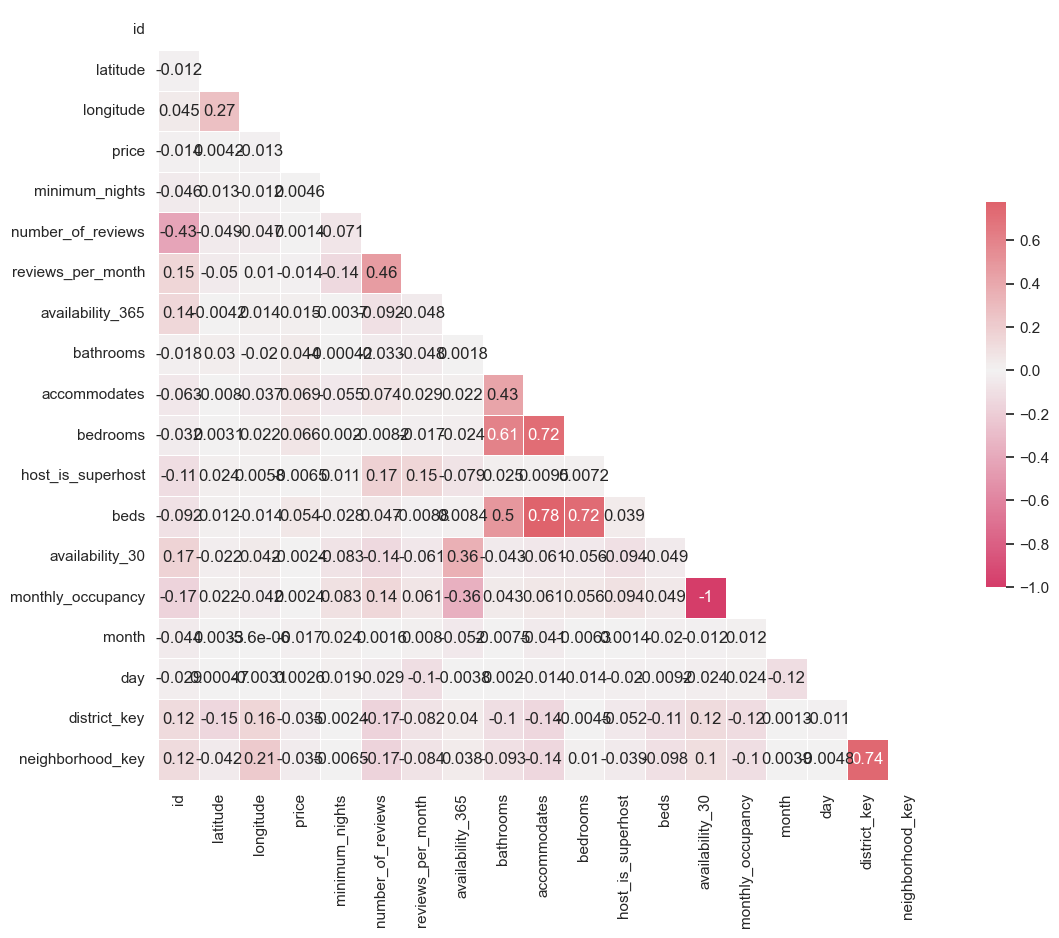

In [117]:
import seaborn as sns
import pylab  as plt

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(clean_info.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(clean_info.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [118]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [119]:
clean_info = pd.get_dummies(clean_info)
clean_info.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,bathrooms,accommodates,...,neighbourhood_group_San Blas - Canillejas,neighbourhood_group_Tetuán,neighbourhood_group_Usera,neighbourhood_group_Vicálvaro,neighbourhood_group_Villa de Vallecas,neighbourhood_group_Villaverde,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6369,40.457240,-3.676880,90,4,104,0.65,98,1.0,2,...,0,0,0,0,0,0,0,0,1,0
1,451174,40.434551,-3.698387,47,3,33,0.53,72,1.0,1,...,0,0,0,0,0,0,0,0,1,0
2,24805,40.421830,-3.705290,92,5,29,0.28,161,1.0,3,...,0,0,0,0,0,0,1,0,0,0
3,456165,40.390320,-3.713820,30,2,10,0.14,4,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,26825,40.389750,-3.690180,29,3,194,1.22,285,1.0,1,...,0,0,0,0,0,0,0,0,1,0


In [120]:
test = clean_info.drop(['price'], axis=1)
train = clean_info

In [121]:
train.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,bathrooms,accommodates,...,neighbourhood_group_San Blas - Canillejas,neighbourhood_group_Tetuán,neighbourhood_group_Usera,neighbourhood_group_Vicálvaro,neighbourhood_group_Villa de Vallecas,neighbourhood_group_Villaverde,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6369,40.457240,-3.676880,90,4,104,0.65,98,1.0,2,...,0,0,0,0,0,0,0,0,1,0
1,451174,40.434551,-3.698387,47,3,33,0.53,72,1.0,1,...,0,0,0,0,0,0,0,0,1,0
2,24805,40.421830,-3.705290,92,5,29,0.28,161,1.0,3,...,0,0,0,0,0,0,1,0,0,0
3,456165,40.390320,-3.713820,30,2,10,0.14,4,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,26825,40.389750,-3.690180,29,3,194,1.22,285,1.0,1,...,0,0,0,0,0,0,0,0,1,0


In [122]:
full_info.columns

Index(['id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'occupancy_rate', 'bathrooms',
       'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'review_scores_rating', 'monthly_occupancy', 'month',
       'day', 'district_key', 'neighborhood_key'],
      dtype='object')

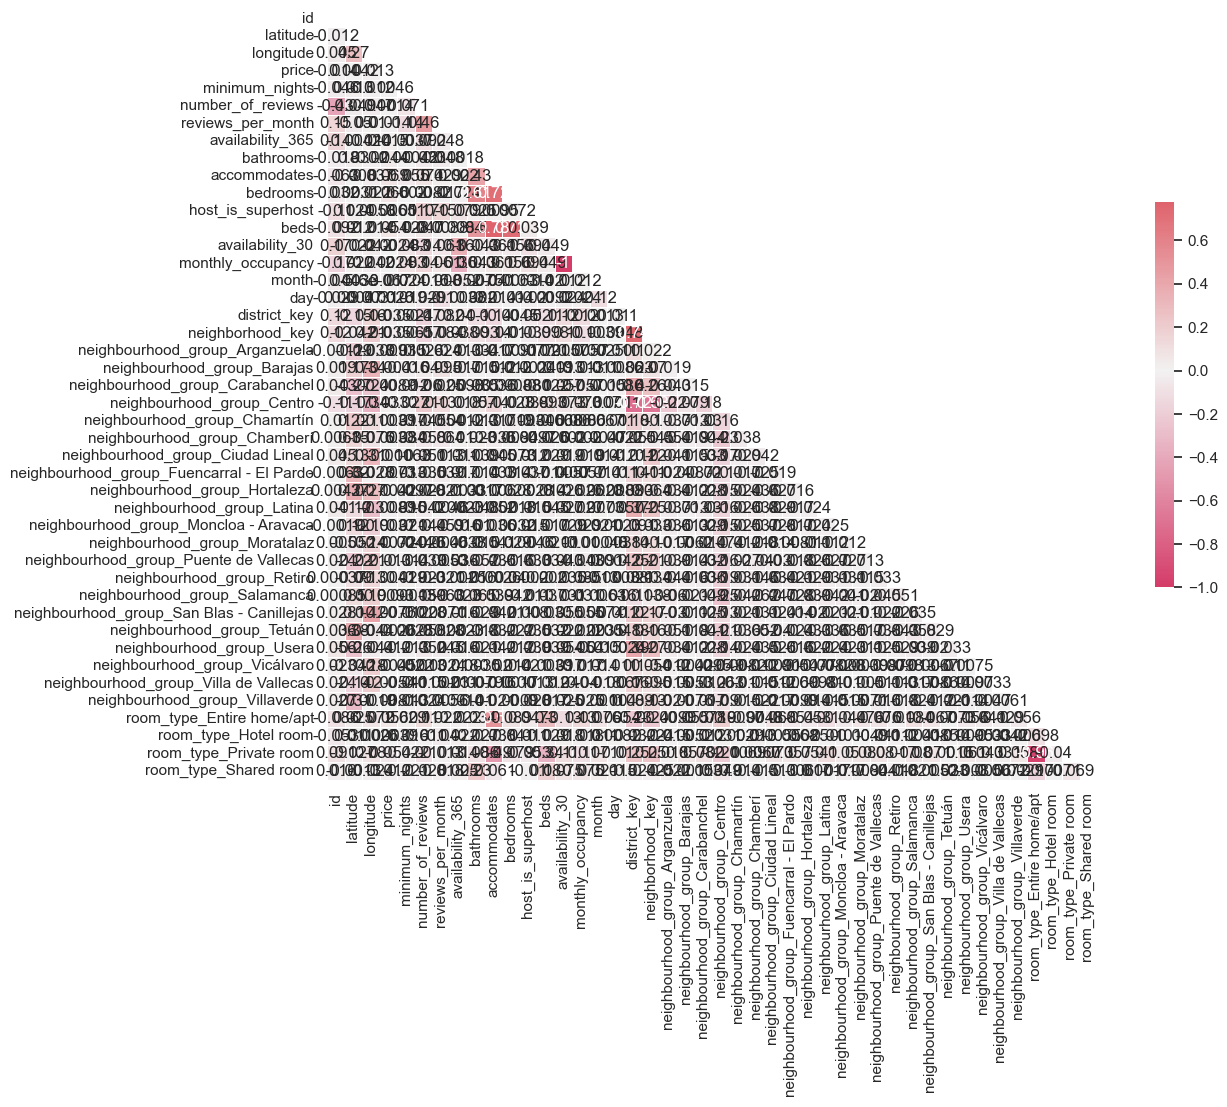

In [123]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [124]:
def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index



In [125]:
outliers_index = tukey_outliers(train,'price')
train.drop(outliers_index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [126]:
train.columns

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'bathrooms', 'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'monthly_occupancy', 'month', 'day', 'district_key',
       'neighborhood_key', 'neighbourhood_group_Arganzuela',
       'neighbourhood_group_Barajas', 'neighbourhood_group_Carabanchel',
       'neighbourhood_group_Centro', 'neighbourhood_group_Chamartín',
       'neighbourhood_group_Chamberí', 'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourho

In [127]:
train['price']

0         90
1         47
2         92
3         30
4         29
        ... 
14135     85
14136     23
14137    150
14138     36
14139     30
Name: price, Length: 14140, dtype: int64

In [128]:
dataset = train 

In [129]:
dataset.to_csv('dataset.csv', index=False)

In [130]:
columns_to_drop = ['id']

train = train.drop(columns_to_drop, axis=1)

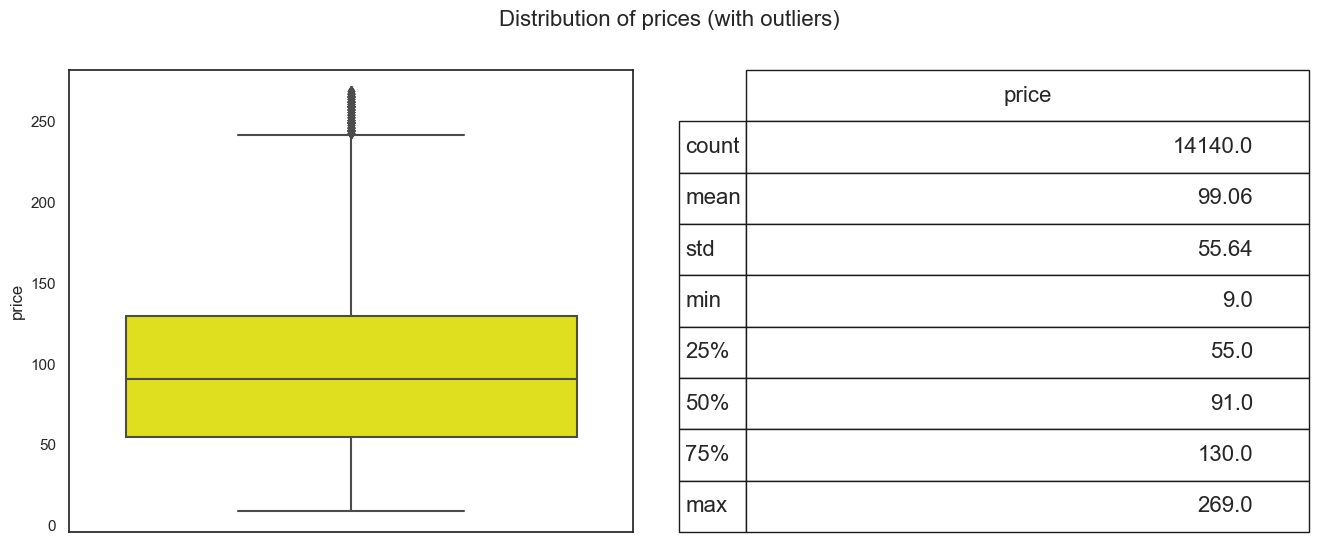

In [131]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = train['price'], ax=ax1, color='yellow')
describe = train['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

In [132]:
%pip install h2o

import h2o

from h2o.automl import H2OAutoML


h2o.init()  # Initialize the H2O cluster

h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

X = ['bedrooms','bathrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room','availability_365']
y = 'price'

automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train) 

Note: you may need to restart the kernel to use updated packages.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_211"; Java(TM) SE Runtime Environment (build 1.8.0_211-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from /Users/rodrigogutierrez/anaconda3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/tmpjttxhc_k
  JVM stdout: /var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/tmpjttxhc_k/h2o_rodrigogutierrez_started_from_python.out
  JVM stderr: /var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/tmpjttxhc_k/h2o_rodrigogutierrez_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_rodrigogutierrez_o68gyv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Intento 2

In [133]:
intento = train

In [134]:
intento.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365', 'bathrooms', 'accommodates',
       'bedrooms', 'host_is_superhost', 'beds', 'availability_30',
       'monthly_occupancy', 'month', 'day', 'district_key', 'neighborhood_key',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_gro

In [135]:
columns_to_drop = ['day', 'reviews_per_month']
intento.drop(columns_to_drop, axis=1, inplace=True)

In [136]:
columns_to_drop1 = ['room_type_Shared room']
intento.drop(columns_to_drop1, axis=1, inplace=True)

In [137]:
intento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14140 entries, 0 to 14139
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   latitude                                   14140 non-null  float64
 1   longitude                                  14140 non-null  float64
 2   price                                      14140 non-null  int64  
 3   minimum_nights                             14140 non-null  int64  
 4   number_of_reviews                          14140 non-null  int64  
 5   availability_365                           14140 non-null  int64  
 6   bathrooms                                  14112 non-null  float64
 7   accommodates                               14140 non-null  int64  
 8   bedrooms                                   9171 non-null   float64
 9   host_is_superhost                          9976 non-null   float64
 10  beds                  

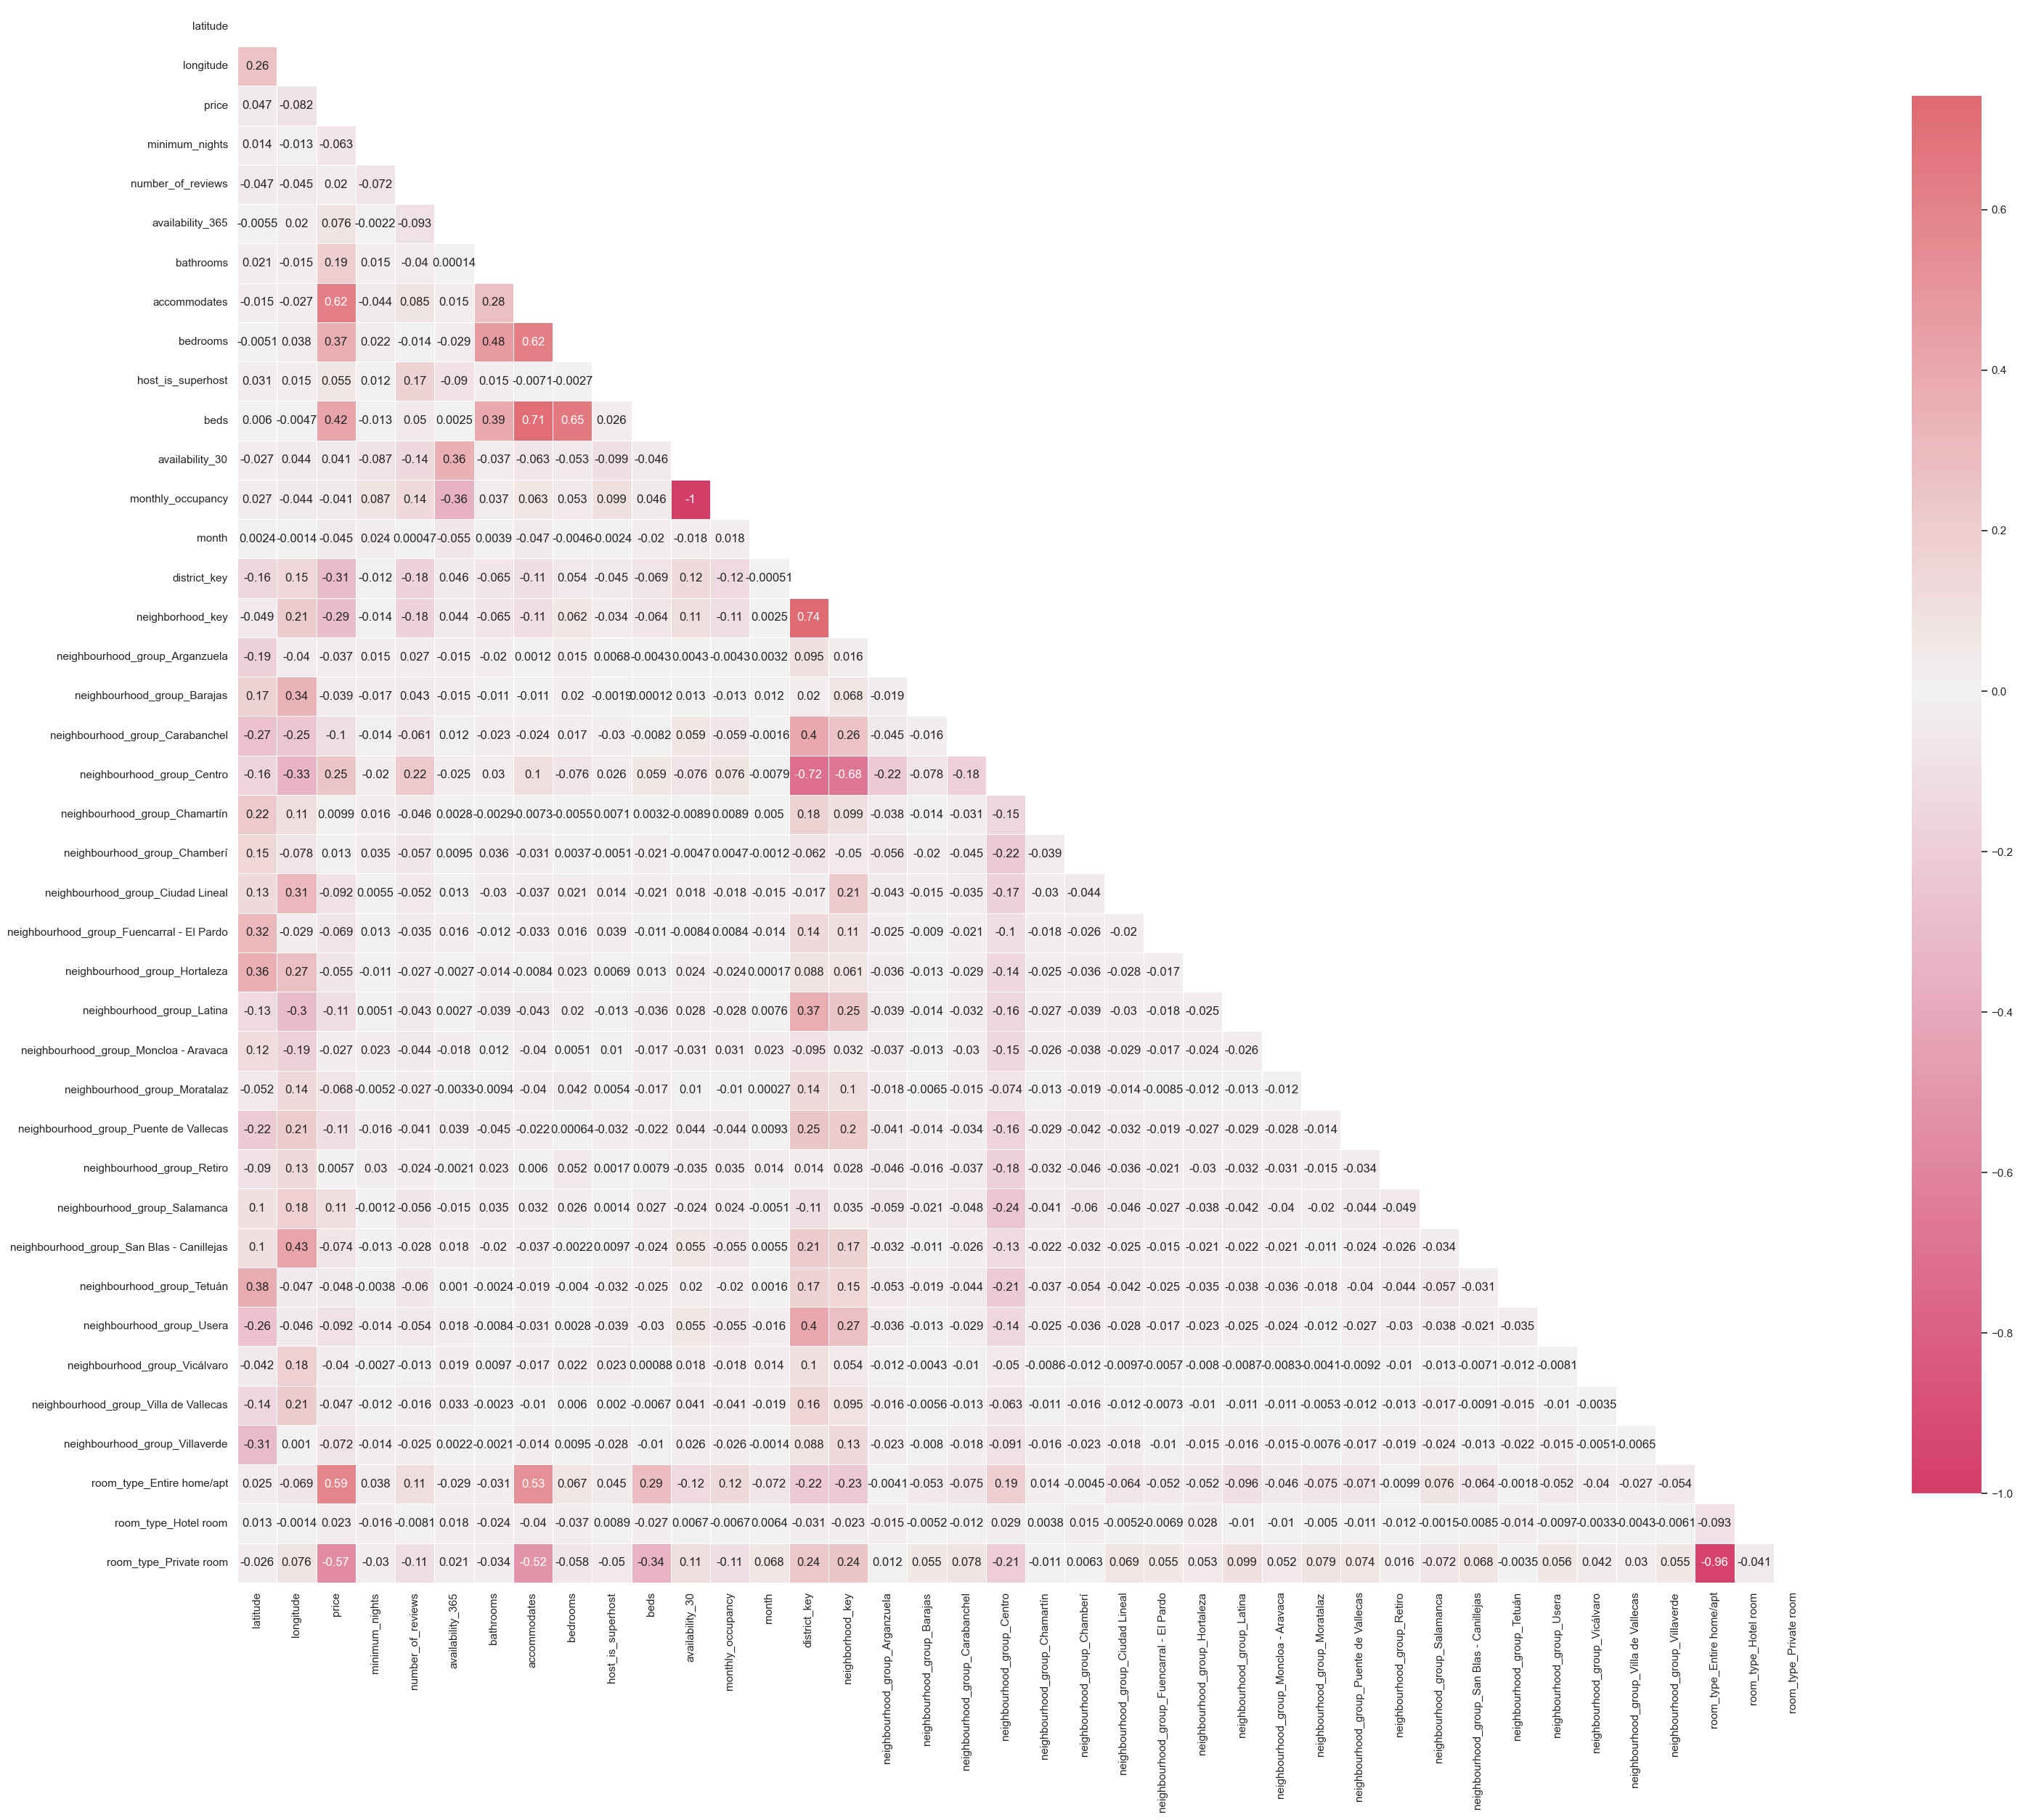

In [138]:
plt.figure(figsize=(35, 50))

sns.set(style='white')

mask=np.triu(np.ones_like(intento.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(intento.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [139]:
entrenamiento = intento
testeo = intento.drop('price', axis=1)


h2o_train2 = h2o.H2OFrame(entrenamiento)
h2o_test2 = h2o.H2OFrame(testeo)

X = ['bedrooms','bathrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room','availability_365','neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbourhood_group_Vicálvaro',
       'neighbourhood_group_Villa de Vallecas',
       'neighbourhood_group_Villaverde']
y = 'price'


automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train2) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Attempt 3

In [140]:
#months as dummies

abc = intento
abc.shape

(14140, 40)

In [141]:
abc.shape

(14140, 40)

In [142]:
entrenamiento3 = abc
testeo3 = abc.drop('price', axis=1)


h2o_train3 = h2o.H2OFrame(entrenamiento3)
h2o_test3 = h2o.H2OFrame(testeo3)

X = ['beds','bathrooms','bedrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room','availability_365','district_key',
       'accommodates','availability_30']
y = 'price'


automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train3) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [143]:
full_info

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,bedrooms,host_is_superhost,beds,availability_30,review_scores_rating,monthly_occupancy,month,day,district_key,neighborhood_key
0,6369,Chamartín,40.457240,-3.676880,Private room,90,4,104,2023-05-31,0.65,...,NaN,NaN,1.0,8,4.87,0.733333,5,31,12,60
1,451174,Chamberí,40.434551,-3.698387,Private room,47,3,33,2023-06-05,0.53,...,NaN,NaN,1.0,12,4.71,0.600000,6,5,4,10
2,24805,Centro,40.421830,-3.705290,Entire home/apt,92,5,29,2023-05-23,0.28,...,6.0,0.0,1.0,12,4.90,0.600000,5,23,1,1
3,456165,Carabanchel,40.390320,-3.713820,Private room,30,2,10,2023-05-21,0.14,...,NaN,NaN,1.0,4,5.00,0.866667,5,21,18,48
4,26825,Arganzuela,40.389750,-3.690180,Private room,29,3,194,2023-05-16,1.22,...,NaN,NaN,1.0,2,4.72,0.933333,5,16,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103,904819749016138029,Usera,40.389707,-3.707122,Entire home/apt,85,1,2,2023-06-08,2.00,...,3.0,0.0,3.0,14,5.00,0.533333,6,8,21,71
15104,904823486276787394,Ciudad Lineal,40.431553,-3.656522,Private room,23,1,1,2023-06-09,1.00,...,NaN,NaN,1.0,12,5.00,0.600000,6,9,5,46
15105,906258842908912339,Tetuán,40.471996,-3.703213,Entire home/apt,150,3,2,2023-06-08,2.00,...,4.0,1.0,4.0,25,5.00,0.166667,6,8,10,83
15106,904854302115777444,Tetuán,40.455684,-3.704978,Private room,36,1,1,2023-06-04,1.00,...,NaN,NaN,1.0,16,5.00,0.466667,6,4,10,81


# Intento 4 Adding Occupation Rate per Month in Madrid (Exog.)

In [144]:
ocup = pd.read_csv('ocupacion.csv', delimiter=';', encoding='latin1')

In [145]:
dataset

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,bathrooms,accommodates,...,neighbourhood_group_San Blas - Canillejas,neighbourhood_group_Tetuán,neighbourhood_group_Usera,neighbourhood_group_Vicálvaro,neighbourhood_group_Villa de Vallecas,neighbourhood_group_Villaverde,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6369,40.457240,-3.676880,90,4,104,0.65,98,1.0,2,...,0,0,0,0,0,0,0,0,1,0
1,451174,40.434551,-3.698387,47,3,33,0.53,72,1.0,1,...,0,0,0,0,0,0,0,0,1,0
2,24805,40.421830,-3.705290,92,5,29,0.28,161,1.0,3,...,0,0,0,0,0,0,1,0,0,0
3,456165,40.390320,-3.713820,30,2,10,0.14,4,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,26825,40.389750,-3.690180,29,3,194,1.22,285,1.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,904819749016138029,40.389707,-3.707122,85,1,2,2.00,51,1.0,5,...,0,0,1,0,0,0,1,0,0,0
14136,904823486276787394,40.431553,-3.656522,23,1,1,1.00,347,NaN,2,...,0,0,0,0,0,0,0,0,1,0
14137,906258842908912339,40.471996,-3.703213,150,3,2,2.00,360,2.0,5,...,0,1,0,0,0,0,1,0,0,0
14138,904854302115777444,40.455684,-3.704978,36,1,1,1.00,161,1.0,1,...,0,1,0,0,0,0,0,0,1,0


In [146]:
ocup

,Puntos turísticos,Establecimientos y personal empleado (plazas),Periodo,Total
0,28079 Madrid,Grado de ocupación por habitaciones,2022M12,"61,47"
1,28079 Madrid,Grado de ocupación por habitaciones,2022M11,"73,95"
2,28079 Madrid,Grado de ocupación por habitaciones,2022M10,"80,17"
3,28079 Madrid,Grado de ocupación por habitaciones,2022M09,"76,24"
4,28079 Madrid,Grado de ocupación por habitaciones,2022M08,"55,80"
5,28079 Madrid,Grado de ocupación por habitaciones,2022M07,"64,58"
6,28079 Madrid,Grado de ocupación por habitaciones,2022M06,"76,31"
7,28079 Madrid,Grado de ocupación por habitaciones,2022M05,"75,38"
8,28079 Madrid,Grado de ocupación por habitaciones,2022M04,"70,22"
9,28079 Madrid,Grado de ocupación por habitaciones,2022M03,"64,47"


In [147]:
ocup['mes'] = ocup['Periodo'].str[-2:]

In [148]:
ocup

,Puntos turísticos,Establecimientos y personal empleado (plazas),Periodo,Total,mes
0,28079 Madrid,Grado de ocupación por habitaciones,2022M12,"61,47",12
1,28079 Madrid,Grado de ocupación por habitaciones,2022M11,"73,95",11
2,28079 Madrid,Grado de ocupación por habitaciones,2022M10,"80,17",10
3,28079 Madrid,Grado de ocupación por habitaciones,2022M09,"76,24",09
4,28079 Madrid,Grado de ocupación por habitaciones,2022M08,"55,80",08
5,28079 Madrid,Grado de ocupación por habitaciones,2022M07,"64,58",07
6,28079 Madrid,Grado de ocupación por habitaciones,2022M06,"76,31",06
7,28079 Madrid,Grado de ocupación por habitaciones,2022M05,"75,38",05
8,28079 Madrid,Grado de ocupación por habitaciones,2022M04,"70,22",04
9,28079 Madrid,Grado de ocupación por habitaciones,2022M03,"64,47",03


In [149]:
ocup = ocup.iloc[:, -2:]

In [150]:
ocup = ocup.rename(columns={'Total': 'ocup'})

In [151]:
ocup

,ocup,mes
0,"61,47",12
1,"73,95",11
2,"80,17",10
3,"76,24",09
4,"55,80",08
5,"64,58",07
6,"76,31",06
7,"75,38",05
8,"70,22",04
9,"64,47",03


In [152]:
ocup['mes'] = ocup['mes'].str.lstrip('0').astype(int)

In [153]:
ocup

,ocup,mes
0,"61,47",12
1,"73,95",11
2,"80,17",10
3,"76,24",9
4,"55,80",8
5,"64,58",7
6,"76,31",6
7,"75,38",5
8,"70,22",4
9,"64,47",3


In [154]:
entrenamiento3['month']

0        5
1        6
2        5
3        5
4        5
        ..
14135    6
14136    6
14137    6
14138    6
14139    6
Name: month, Length: 14140, dtype: int64

In [155]:
result = entrenamiento3.merge(ocup, left_on='month', right_on='mes', how='left')

In [156]:
result.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365', 'bathrooms', 'accommodates', 'bedrooms',
       'host_is_superhost', 'beds', 'availability_30', 'monthly_occupancy',
       'month', 'district_key', 'neighborhood_key',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbour

In [157]:
entrenamiento4 = result
testeo4 = result.drop('price', axis=1)


h2o_train4 = h2o.H2OFrame(entrenamiento4)
h2o_test4 = h2o.H2OFrame(testeo4)

X = ['beds','bathrooms','bedrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room','availability_365','district_key',
       'accommodates','availability_30','ocup']
y = 'price'



automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train4) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [158]:
y_pred=automl.leader.predict(h2o_test4)
predictions_df = y_pred.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [159]:
# Calculate the Spearman's rank correlation matrix
correlation_matrix2 = result.corr(method='spearman')

# Get the correlation values for the 'price' column
price_correlation3 = correlation_matrix2['price']

# Order the correlation values in descending order
price_correlation3 = price_correlation3.abs().sort_values(ascending=False)

# Print the correlation values in descending order
print(price_correlation3)

/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/3749324132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = result.corr(method='spearman')


price                                        1.000000
room_type_Entire home/apt                    0.670140
accommodates                                 0.667528
room_type_Private room                       0.647017
beds                                         0.517253
bedrooms                                     0.421772
district_key                                 0.332099
neighborhood_key                             0.305452
neighbourhood_group_Centro                   0.272348
bathrooms                                    0.217529
neighbourhood_group_Latina                   0.124372
neighbourhood_group_Puente de Vallecas       0.121332
neighbourhood_group_Carabanchel              0.115608
neighbourhood_group_Salamanca                0.106015
neighbourhood_group_Ciudad Lineal            0.102081
neighbourhood_group_Usera                    0.098702
latitude                                     0.084950
neighbourhood_group_Villaverde               0.081127
neighbourhood_group_San Blas

In [160]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14140 entries, 0 to 14139
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   latitude                                   14140 non-null  float64
 1   longitude                                  14140 non-null  float64
 2   price                                      14140 non-null  int64  
 3   minimum_nights                             14140 non-null  int64  
 4   number_of_reviews                          14140 non-null  int64  
 5   availability_365                           14140 non-null  int64  
 6   bathrooms                                  14112 non-null  float64
 7   accommodates                               14140 non-null  int64  
 8   bedrooms                                   9171 non-null   float64
 9   host_is_superhost                          9976 non-null   float64
 10  beds                  

In [161]:
result['ocup'] = result['ocup'].str.replace(',', '.').astype(float) 

In [162]:
result['price'].corr(result['ocup'])

0.0012727223208733231

In [163]:
result['price'].corr(result['ocup'], method='spearman')

-0.017138367486662986

In [164]:
result['price'].corr(result['mes'], method='spearman')

-0.06871169549682471

In [165]:
result['price'].corr(result['accommodates'], method='spearman')

0.6675283545327636

In [166]:
result['ocup']

0        75.38
1        76.31
2        75.38
3        75.38
4        75.38
         ...  
14135    76.31
14136    76.31
14137    76.31
14138    76.31
14139    76.31
Name: ocup, Length: 14140, dtype: float64

In [167]:
# Calculate the Spearman's rank correlation matrix
correlation_matrix2 = result.corr(method='spearman')

# Get the correlation values for the 'price' column
price_correlation3 = correlation_matrix2['price']

# Order the correlation values in descending order
price_correlation3 = price_correlation3.abs().sort_values(ascending=False)

# Print the correlation values in descending order
print(price_correlation3)

price                                        1.000000
room_type_Entire home/apt                    0.670140
accommodates                                 0.667528
room_type_Private room                       0.647017
beds                                         0.517253
bedrooms                                     0.421772
district_key                                 0.332099
neighborhood_key                             0.305452
neighbourhood_group_Centro                   0.272348
bathrooms                                    0.217529
neighbourhood_group_Latina                   0.124372
neighbourhood_group_Puente de Vallecas       0.121332
neighbourhood_group_Carabanchel              0.115608
neighbourhood_group_Salamanca                0.106015
neighbourhood_group_Ciudad Lineal            0.102081
neighbourhood_group_Usera                    0.098702
latitude                                     0.084950
neighbourhood_group_Villaverde               0.081127
neighbourhood_group_San Blas

# 5th Attempt - Adding Average Nighly Fees per Month in Madrid (Exogenous)

In [168]:
import pandas as pd

data = {
    'Mes': ['2022M12', '2022M11', '2022M10', '2022M09', '2022M08', '2022M07', '2022M06', '2022M05', '2022M04', '2022M03', '2022M02', '2022M01'],
    'Tarifa': [121.73, 124.84, 143.20, 130.97, 94.87, 117.03, 129.88, 125.39, 112.14, 106.67, 95.96, 92.16]
}

df = pd.DataFrame(data)

print(df)

        Mes  Tarifa
0   2022M12  121.73
1   2022M11  124.84
2   2022M10  143.20
3   2022M09  130.97
4   2022M08   94.87
5   2022M07  117.03
6   2022M06  129.88
7   2022M05  125.39
8   2022M04  112.14
9   2022M03  106.67
10  2022M02   95.96
11  2022M01   92.16


In [169]:
df['mes'] = df['Mes'].str[-2:]
df

,Mes,Tarifa,mes
0,2022M12,121.73,12
1,2022M11,124.84,11
2,2022M10,143.20,10
3,2022M09,130.97,09
4,2022M08,94.87,08
5,2022M07,117.03,07
6,2022M06,129.88,06
7,2022M05,125.39,05
8,2022M04,112.14,04
9,2022M03,106.67,03


In [170]:
df['mes'] = df['mes'].str.lstrip('0')

df

,Mes,Tarifa,mes
0,2022M12,121.73,12
1,2022M11,124.84,11
2,2022M10,143.20,10
3,2022M09,130.97,9
4,2022M08,94.87,8
5,2022M07,117.03,7
6,2022M06,129.88,6
7,2022M05,125.39,5
8,2022M04,112.14,4
9,2022M03,106.67,3


In [171]:
tabla = {
    'mes': [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Tarifa': [121.73, 124.84, 143.20, 130.97, 94.87, 117.03, 129.88, 125.39, 112.14, 106.67, 95.96, 92.16]
    
}

tarifa = pd.DataFrame(tabla)

tarifa = tarifa.loc[:, ['mes', 'Tarifa']]

tarifa

,mes,Tarifa
0,12,121.73
1,11,124.84
2,10,143.20
3,9,130.97
4,8,94.87
5,7,117.03
6,6,129.88
7,5,125.39
8,4,112.14
9,3,106.67


In [172]:
tarifa.to_csv('tarifa.csv', index=False)

In [173]:
tarifa = result.merge(tarifa, on='mes')

In [174]:
result.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365', 'bathrooms', 'accommodates', 'bedrooms',
       'host_is_superhost', 'beds', 'availability_30', 'monthly_occupancy',
       'month', 'district_key', 'neighborhood_key',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbour

In [175]:
entrenamiento5 = tarifa
testeo5 = tarifa.drop('price', axis=1)


h2o_train5 = h2o.H2OFrame(entrenamiento5)
h2o_test5 = h2o.H2OFrame(testeo5)

X = ['beds','bedrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room',
       'accommodates','availability_30','ocup','Tarifa']
y = 'price'



automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train5) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [176]:
result = entrenamiento3.merge(ocup, left_on='month', right_on='mes', how='left')

In [177]:
median_price_neighborhood_group['how_expensive'] = median_price_neighborhood_group['median_price'].rank(ascending=True, method='dense')

median_price_neighborhood_group

,neighbourhood_group,median_price,how_expensive
14,Salamanca,120.0,16.0
3,Centro,106.0,15.0
4,Chamartín,93.0,14.0
13,Retiro,88.0,13.0
5,Chamberí,88.0,13.0
0,Arganzuela,81.0,12.0
16,Tetuán,79.0,11.0
10,Moncloa - Aravaca,74.0,10.0
8,Hortaleza,71.0,9.0
15,San Blas - Canillejas,60.0,8.0


In [178]:
median_price_neighborhood_group['district_key'] = median_price_neighborhood_group['neighbourhood_group'].map(district_dict)

median_price_neighborhood_group

,neighbourhood_group,median_price,how_expensive,district_key
14,Salamanca,120.0,16.0,3
3,Centro,106.0,15.0,1
4,Chamartín,93.0,14.0,12
13,Retiro,88.0,13.0,6
5,Chamberí,88.0,13.0,4
0,Arganzuela,81.0,12.0,8
16,Tetuán,79.0,11.0,10
10,Moncloa - Aravaca,74.0,10.0,2
8,Hortaleza,71.0,9.0,9
15,San Blas - Canillejas,60.0,8.0,15


In [179]:
info_neighborhood = median_price_neighborhood_group

In [180]:
dataset = dataset.merge(info_neighborhood, on='district_key', how='left')

In [181]:
dataset.columns

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'bathrooms', 'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'monthly_occupancy', 'month', 'day', 'district_key',
       'neighborhood_key', 'neighbourhood_group_Arganzuela',
       'neighbourhood_group_Barajas', 'neighbourhood_group_Carabanchel',
       'neighbourhood_group_Centro', 'neighbourhood_group_Chamartín',
       'neighbourhood_group_Chamberí', 'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourho

In [182]:
columns_to_drop = ['neighbourhood_group_Arganzuela',
       'neighbourhood_group_Barajas', 'neighbourhood_group_Carabanchel',
       'neighbourhood_group_Centro', 'neighbourhood_group_Chamartín',
       'neighbourhood_group_Chamberí', 'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbourhood_group_Vicálvaro',
       'neighbourhood_group_Villa de Vallecas',
       'neighbourhood_group_Villaverde', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']

# Drop the columns from the DataFrame
dataset = dataset.drop(columns_to_drop, axis=1)

In [183]:
len(dataset)

14140

In [184]:
dataset.columns

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'bathrooms', 'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'monthly_occupancy', 'month', 'day', 'district_key',
       'neighborhood_key', 'neighbourhood_group', 'median_price',
       'how_expensive'],
      dtype='object')

In [185]:
occup = result[['ocup','mes']]
occup

,ocup,mes
0,"75,38",5
1,"76,31",6
2,"75,38",5
3,"75,38",5
4,"75,38",5
...,...,...
14135,"76,31",6
14136,"76,31",6
14137,"76,31",6
14138,"76,31",6


In [186]:
print(dataset.columns)

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'bathrooms', 'accommodates', 'bedrooms', 'host_is_superhost', 'beds',
       'availability_30', 'monthly_occupancy', 'month', 'day', 'district_key',
       'neighborhood_key', 'neighbourhood_group', 'median_price',
       'how_expensive'],
      dtype='object')


In [187]:
occup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14140 entries, 0 to 14139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ocup    14140 non-null  object
 1   mes     14140 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 331.4+ KB


In [188]:
occup

,ocup,mes
0,"75,38",5
1,"76,31",6
2,"75,38",5
3,"75,38",5
4,"75,38",5
...,...,...
14135,"76,31",6
14136,"76,31",6
14137,"76,31",6
14138,"76,31",6


In [218]:
# Reemplaza todas las comas por puntos en la columna 'ocup'
occup['ocup'] = occup['ocup'].str.replace(',', '.')

occup

/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/631045460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occup['ocup'] = occup['ocup'].str.replace(',', '.')


,ocup,mes
0,75.38,5
1,76.31,6
2,75.38,5
3,75.38,5
4,75.38,5
...,...,...
14135,76.31,6
14136,76.31,6
14137,76.31,6
14138,76.31,6


In [219]:
occup.to_csv('ocup1.csv', index=False)

In [190]:
predictions_df.to_csv('predicted_values.csv', index=False)

In [191]:
len(predictions_df)

14140

In [192]:
len(dataset)

14140

In [193]:
combined_dataset = pd.concat([dataset, predictions_df], axis=1)
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [194]:
import pandas as pd
import calendar

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df_month_names = pd.DataFrame(list(month_names.items()), columns=['month', 'month_name'])
df_month_names['month_name'] = df_month_names['month_name'].apply(lambda x: x.strip('0'))

df_month_names

,month,month_name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


In [195]:
df_month_names.to_csv('month_names.csv', index=False)

In [196]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15108 entries, 0 to 23328
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15108 non-null  int64         
 1   name                            15108 non-null  object        
 2   host_id                         15108 non-null  int64         
 3   host_name                       15108 non-null  object        
 4   neighbourhood_group             15108 non-null  object        
 5   neighbourhood                   15108 non-null  object        
 6   latitude                        15108 non-null  float64       
 7   longitude                       15108 non-null  float64       
 8   room_type                       15108 non-null  object        
 9   price                           15108 non-null  int64         
 10  minimum_nights                  15108 non-null  int64         
 11  nu

In [197]:
neighb_info = filtered_df[['id','neighbourhood']]

In [198]:
neighb_info.to_csv('neighb_info.csv', index=True)

# Last Attempt - Adding Number of Rentals

In [199]:
df = pd.read_csv('airbnb_ocup.csv', delimiter=';', encoding='latin1')

In [200]:
df = df[['Periodo','Total']]

In [201]:
df

,Periodo,Total
0,2023M07,63.117
1,2023M06,67.455
2,2023M05,64.138
3,2023M04,67.647
4,2023M03,54.526
5,2023M02,52.550
6,2023M01,51.365
7,2022M12,67.453
8,2022M11,57.602
9,2022M10,61.239


In [202]:
df['Periodo'] = df['Periodo'].str[5:].str.lstrip('0')

# Replace '.' with ','
df['Periodo'] = df['Periodo'].str.replace('.', ',')

print(df)

   Periodo    Total
0        7   63.117
1        6   67.455
2        5   64.138
3        4   67.647
4        3   54.526
5        2   52.550
6        1   51.365
7       12   67.453
8       11   57.602
9       10   61.239
10       9   59.270
11       8   53.366
12       7   55.561
13       7  211.756
14       6  214.048
15       5  211.738
16       4  221.780
17       3  189.185
18       2  170.426
19       1  170.368
20      12  201.435
21      11  182.224
22      10  206.409
23       9  195.902
24       8  194.627
25       7  199.367


/var/folders/9r/gs1g10c57dq76y5t067393s40000gn/T/ipykernel_82234/2421887454.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Periodo'] = df['Periodo'].str.replace('.', ',')


In [203]:
df = df.iloc[1:]


df = df.groupby('Periodo')['Total'].sum().reset_index()

df

,Periodo,Total
0,1,221.733
1,10,267.648
2,11,239.826
3,12,268.888
4,2,222.976
5,3,243.711
6,4,289.427
7,5,275.876
8,6,281.503
9,7,466.684


In [204]:
df = df.rename(columns={'Total': 'rental_occup'})

In [205]:
df = df.rename(columns={'Periodo': 'month'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         12 non-null     object 
 1   rental_occup  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [206]:
df['month'] = df['month'].astype(int)

In [207]:
tarifa['month']

0         5
1         5
2         5
3         5
4         5
         ..
14135    11
14136    11
14137    11
14138    11
14139    11
Name: month, Length: 14140, dtype: int64

In [208]:
tarifa.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365', 'bathrooms', 'accommodates', 'bedrooms',
       'host_is_superhost', 'beds', 'availability_30', 'monthly_occupancy',
       'month', 'district_key', 'neighborhood_key',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbour

In [209]:
ultimo_intento = pd.merge(tarifa, df, how='left', on='month')

In [210]:
entrenamiento6 = ultimo_intento
testeo6 = ultimo_intento.drop('price', axis=1)


h2o_train6 = h2o.H2OFrame(entrenamiento6)
h2o_test6 = h2o.H2OFrame(testeo6)

X = ['beds','bathrooms','bedrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room','availability_365','district_key',
       'accommodates','rental_occup']
y = 'price'



automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train6) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [211]:
rental_occup = df
rental_occup.to_csv('rental_occup.csv', index=True)

In [212]:
#

entrenamiento5 = tarifa
testeo5 = tarifa.drop('price', axis=1)


h2o_train5 = h2o.H2OFrame(entrenamiento5)
h2o_test5 = h2o.H2OFrame(testeo5)

X = ['beds','bedrooms','minimum_nights','room_type_Entire home/apt','room_type_Private room','room_type_Hotel room',
       'accommodates','availability_30','ocup','Tarifa']
y = 'price'



automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')
automl.train(x=X,
             y=y,
             training_frame=h2o_train5) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [213]:
dataset['month'].unique()

array([ 5,  6,  7,  9,  4, 12,  1,  2,  3, 10,  8, 11])

In [214]:
# Create the CSV file
predictions_df.to_csv('predicted_values.csv', index=False)

In [215]:
y_pred=automl.leader.predict(h2test)

NameError: name 'h2test' is not defined

In [ ]:
full_info.info()

In [ ]:
full_info.isnull().sum()

In [ ]:
import seaborn as sns
import pylab  as plt

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(full_info.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(full_info.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Now, I need to Prepare the Data for the Machine Learning Process

In [ ]:
filtered_df